In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.python import keras
import seaborn as sns

In [12]:
nursery_data = pd.read_csv('nursery_data.csv', names=["parents","has_nurs","form","children","housing","finance","social","health","class"])
print(nursery_data.isnull())
nursery_data

       parents  has_nurs   form  children  housing  finance  social  health  \
0        False     False  False     False    False    False   False   False   
1        False     False  False     False    False    False   False   False   
2        False     False  False     False    False    False   False   False   
3        False     False  False     False    False    False   False   False   
4        False     False  False     False    False    False   False   False   
...        ...       ...    ...       ...      ...      ...     ...     ...   
12955    False     False  False     False    False    False   False   False   
12956    False     False  False     False    False    False   False   False   
12957    False     False  False     False    False    False   False   False   
12958    False     False  False     False    False    False   False   False   
12959    False     False  False     False    False    False   False   False   

       class  
0      False  
1      False  
2     

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [13]:
#Categorical
features = ["parents","has_nurs","form","children","housing","finance","social","health","class"]
for column in features:
    nursery_data[column] = nursery_data[column].astype("category").cat.codes
nursery_data

,parents,has_nurs,form,children,housing,finance,social,health,class
0,2,3,0,0,0,0,0,2,2
1,2,3,0,0,0,0,0,1,1
2,2,3,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2
4,2,3,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...
12955,0,4,2,3,1,1,2,1,3
12956,0,4,2,3,1,1,2,0,0
12957,0,4,2,3,1,1,1,2,3
12958,0,4,2,3,1,1,1,1,3


In [14]:
target = ["class"]
X=nursery_data.drop(target,axis=1)
X=np.array(X)
Y=pd.DataFrame(nursery_data[target])
Y=np.array(Y)
X,Y

(array([[2, 3, 0, ..., 0, 0, 2],
        [2, 3, 0, ..., 0, 0, 1],
        [2, 3, 0, ..., 0, 0, 0],
        ...,
        [0, 4, 2, ..., 1, 1, 2],
        [0, 4, 2, ..., 1, 1, 1],
        [0, 4, 2, ..., 1, 1, 0]], dtype=int8),
 array([[2],
        [1],
        [0],
        ...,
        [3],
        [3],
        [0]], dtype=int8))

In [15]:
model = tf.keras.Sequential([
    keras.layers.Dense(25, input_shape=(8,), activation=tf.nn.tanh),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.30)
model.compile(loss='sparse_categorical_crossentropy',
            optimizer=keras.optimizers.Adam(0.000001),
             metrics=['accuracy'])
xtest.shape,ytest.shape,xtrain.shape,ytrain.shape

((3888, 8), (3888, 1), (9072, 8), (9072, 1))

In [16]:
history = model.fit(xtrain, ytrain, epochs=10000, validation_split=0.10,verbose=2)

Train on 8164 samples, validate on 908 samples
Epoch 1/10000
 - 1s - loss: 1.6529 - acc: 0.2880 - val_loss: 1.5879 - val_acc: 0.2963
Epoch 2/10000
 - 1s - loss: 1.6482 - acc: 0.2836 - val_loss: 1.5842 - val_acc: 0.2963
Epoch 3/10000
 - 0s - loss: 1.6383 - acc: 0.2934 - val_loss: 1.5806 - val_acc: 0.2985
Epoch 4/10000
 - 0s - loss: 1.6417 - acc: 0.2916 - val_loss: 1.5770 - val_acc: 0.2985
Epoch 5/10000
 - 0s - loss: 1.6441 - acc: 0.2858 - val_loss: 1.5734 - val_acc: 0.2985
Epoch 6/10000
 - 0s - loss: 1.6252 - acc: 0.2948 - val_loss: 1.5698 - val_acc: 0.3007
Epoch 7/10000
 - 0s - loss: 1.6235 - acc: 0.2932 - val_loss: 1.5663 - val_acc: 0.3007
Epoch 8/10000
 - 0s - loss: 1.6223 - acc: 0.2963 - val_loss: 1.5628 - val_acc: 0.3029
Epoch 9/10000
 - 0s - loss: 1.6136 - acc: 0.3011 - val_loss: 1.5594 - val_acc: 0.3062
Epoch 10/10000
 - 1s - loss: 1.6187 - acc: 0.2965 - val_loss: 1.5559 - val_acc: 0.3062
Epoch 11/10000
 - 1s - loss: 1.6127 - acc: 0.3040 - val_loss: 1.5525 - val_acc: 0.3095
Epoch

Epoch 95/10000
 - 1s - loss: 1.3872 - acc: 0.3698 - val_loss: 1.3351 - val_acc: 0.3943
Epoch 96/10000
 - 1s - loss: 1.3942 - acc: 0.3600 - val_loss: 1.3332 - val_acc: 0.3954
Epoch 97/10000
 - 0s - loss: 1.3850 - acc: 0.3667 - val_loss: 1.3314 - val_acc: 0.3954
Epoch 98/10000
 - 0s - loss: 1.3883 - acc: 0.3609 - val_loss: 1.3295 - val_acc: 0.3954
Epoch 99/10000
 - 0s - loss: 1.3810 - acc: 0.3634 - val_loss: 1.3277 - val_acc: 0.3954
Epoch 100/10000
 - 0s - loss: 1.3753 - acc: 0.3688 - val_loss: 1.3259 - val_acc: 0.3954
Epoch 101/10000
 - 0s - loss: 1.3792 - acc: 0.3727 - val_loss: 1.3241 - val_acc: 0.3954
Epoch 102/10000
 - 1s - loss: 1.3741 - acc: 0.3688 - val_loss: 1.3224 - val_acc: 0.3921
Epoch 103/10000
 - 0s - loss: 1.3738 - acc: 0.3740 - val_loss: 1.3206 - val_acc: 0.3943
Epoch 104/10000
 - 0s - loss: 1.3667 - acc: 0.3715 - val_loss: 1.3189 - val_acc: 0.3954
Epoch 105/10000
 - 0s - loss: 1.3707 - acc: 0.3673 - val_loss: 1.3172 - val_acc: 0.3965
Epoch 106/10000
 - 0s - loss: 1.3718 

 - 0s - loss: 1.2617 - acc: 0.3972 - val_loss: 1.2097 - val_acc: 0.4383
Epoch 189/10000
 - 0s - loss: 1.2606 - acc: 0.3976 - val_loss: 1.2088 - val_acc: 0.4394
Epoch 190/10000
 - 0s - loss: 1.2613 - acc: 0.3943 - val_loss: 1.2078 - val_acc: 0.4405
Epoch 191/10000
 - 0s - loss: 1.2603 - acc: 0.3977 - val_loss: 1.2068 - val_acc: 0.4416
Epoch 192/10000
 - 0s - loss: 1.2628 - acc: 0.3928 - val_loss: 1.2059 - val_acc: 0.4427
Epoch 193/10000
 - 0s - loss: 1.2571 - acc: 0.4087 - val_loss: 1.2049 - val_acc: 0.4438
Epoch 194/10000
 - 0s - loss: 1.2620 - acc: 0.4003 - val_loss: 1.2039 - val_acc: 0.4427
Epoch 195/10000
 - 1s - loss: 1.2539 - acc: 0.4070 - val_loss: 1.2030 - val_acc: 0.4427
Epoch 196/10000
 - 1s - loss: 1.2516 - acc: 0.4058 - val_loss: 1.2021 - val_acc: 0.4427
Epoch 197/10000
 - 1s - loss: 1.2532 - acc: 0.4049 - val_loss: 1.2011 - val_acc: 0.4416
Epoch 198/10000
 - 1s - loss: 1.2504 - acc: 0.4002 - val_loss: 1.2002 - val_acc: 0.4416
Epoch 199/10000
 - 0s - loss: 1.2528 - acc: 0.40

Epoch 282/10000
 - 0s - loss: 1.1888 - acc: 0.4347 - val_loss: 1.1337 - val_acc: 0.4923
Epoch 283/10000
 - 0s - loss: 1.1768 - acc: 0.4484 - val_loss: 1.1330 - val_acc: 0.4945
Epoch 284/10000
 - 0s - loss: 1.1818 - acc: 0.4433 - val_loss: 1.1323 - val_acc: 0.4945
Epoch 285/10000
 - 0s - loss: 1.1822 - acc: 0.4394 - val_loss: 1.1316 - val_acc: 0.4956
Epoch 286/10000
 - 0s - loss: 1.1842 - acc: 0.4479 - val_loss: 1.1310 - val_acc: 0.4956
Epoch 287/10000
 - 0s - loss: 1.1776 - acc: 0.4500 - val_loss: 1.1303 - val_acc: 0.4956
Epoch 288/10000
 - 0s - loss: 1.1863 - acc: 0.4366 - val_loss: 1.1296 - val_acc: 0.4956
Epoch 289/10000
 - 0s - loss: 1.1763 - acc: 0.4459 - val_loss: 1.1289 - val_acc: 0.4967
Epoch 290/10000
 - 0s - loss: 1.1813 - acc: 0.4448 - val_loss: 1.1282 - val_acc: 0.4967
Epoch 291/10000
 - 0s - loss: 1.1746 - acc: 0.4533 - val_loss: 1.1276 - val_acc: 0.4967
Epoch 292/10000
 - 0s - loss: 1.1752 - acc: 0.4410 - val_loss: 1.1269 - val_acc: 0.4978
Epoch 293/10000
 - 0s - loss: 1.

 - 0s - loss: 1.1245 - acc: 0.4866 - val_loss: 1.0759 - val_acc: 0.5595
Epoch 376/10000
 - 0s - loss: 1.1234 - acc: 0.4859 - val_loss: 1.0754 - val_acc: 0.5617
Epoch 377/10000
 - 0s - loss: 1.1291 - acc: 0.4820 - val_loss: 1.0748 - val_acc: 0.5628
Epoch 378/10000
 - 0s - loss: 1.1178 - acc: 0.4950 - val_loss: 1.0742 - val_acc: 0.5639
Epoch 379/10000
 - 0s - loss: 1.1191 - acc: 0.4906 - val_loss: 1.0737 - val_acc: 0.5650
Epoch 380/10000
 - 0s - loss: 1.1186 - acc: 0.4863 - val_loss: 1.0731 - val_acc: 0.5650
Epoch 381/10000
 - 0s - loss: 1.1271 - acc: 0.4794 - val_loss: 1.0725 - val_acc: 0.5650
Epoch 382/10000
 - 0s - loss: 1.1195 - acc: 0.4893 - val_loss: 1.0720 - val_acc: 0.5661
Epoch 383/10000
 - 0s - loss: 1.1129 - acc: 0.4956 - val_loss: 1.0714 - val_acc: 0.5672
Epoch 384/10000
 - 0s - loss: 1.1193 - acc: 0.4878 - val_loss: 1.0708 - val_acc: 0.5672
Epoch 385/10000
 - 0s - loss: 1.1181 - acc: 0.4952 - val_loss: 1.0703 - val_acc: 0.5672
Epoch 386/10000
 - 0s - loss: 1.1178 - acc: 0.49

Epoch 469/10000
 - 0s - loss: 1.0760 - acc: 0.5285 - val_loss: 1.0254 - val_acc: 0.6156
Epoch 470/10000
 - 0s - loss: 1.0682 - acc: 0.5375 - val_loss: 1.0249 - val_acc: 0.6156
Epoch 471/10000
 - 0s - loss: 1.0731 - acc: 0.5300 - val_loss: 1.0243 - val_acc: 0.6156
Epoch 472/10000
 - 0s - loss: 1.0657 - acc: 0.5265 - val_loss: 1.0238 - val_acc: 0.6189
Epoch 473/10000
 - 0s - loss: 1.0687 - acc: 0.5314 - val_loss: 1.0233 - val_acc: 0.6189
Epoch 474/10000
 - 0s - loss: 1.0649 - acc: 0.5378 - val_loss: 1.0228 - val_acc: 0.6200
Epoch 475/10000
 - 0s - loss: 1.0666 - acc: 0.5343 - val_loss: 1.0223 - val_acc: 0.6178
Epoch 476/10000
 - 0s - loss: 1.0665 - acc: 0.5359 - val_loss: 1.0218 - val_acc: 0.6178
Epoch 477/10000
 - 0s - loss: 1.0662 - acc: 0.5359 - val_loss: 1.0213 - val_acc: 0.6189
Epoch 478/10000
 - 0s - loss: 1.0587 - acc: 0.5432 - val_loss: 1.0208 - val_acc: 0.6178
Epoch 479/10000
 - 0s - loss: 1.0676 - acc: 0.5386 - val_loss: 1.0203 - val_acc: 0.6178
Epoch 480/10000
 - 0s - loss: 1.

 - 0s - loss: 1.0289 - acc: 0.5683 - val_loss: 0.9797 - val_acc: 0.6608
Epoch 563/10000
 - 0s - loss: 1.0221 - acc: 0.5661 - val_loss: 0.9792 - val_acc: 0.6608
Epoch 564/10000
 - 0s - loss: 1.0255 - acc: 0.5703 - val_loss: 0.9787 - val_acc: 0.6597
Epoch 565/10000
 - 0s - loss: 1.0179 - acc: 0.5764 - val_loss: 0.9783 - val_acc: 0.6608
Epoch 566/10000
 - 0s - loss: 1.0220 - acc: 0.5692 - val_loss: 0.9778 - val_acc: 0.6630
Epoch 567/10000
 - 0s - loss: 1.0244 - acc: 0.5685 - val_loss: 0.9773 - val_acc: 0.6619
Epoch 568/10000
 - 0s - loss: 1.0218 - acc: 0.5721 - val_loss: 0.9768 - val_acc: 0.6619
Epoch 569/10000
 - 0s - loss: 1.0273 - acc: 0.5671 - val_loss: 0.9764 - val_acc: 0.6619
Epoch 570/10000
 - 0s - loss: 1.0275 - acc: 0.5688 - val_loss: 0.9759 - val_acc: 0.6619
Epoch 571/10000
 - 0s - loss: 1.0196 - acc: 0.5717 - val_loss: 0.9754 - val_acc: 0.6619
Epoch 572/10000
 - 0s - loss: 1.0192 - acc: 0.5718 - val_loss: 0.9750 - val_acc: 0.6630
Epoch 573/10000
 - 0s - loss: 1.0240 - acc: 0.57

Epoch 656/10000
 - 0s - loss: 0.9809 - acc: 0.6036 - val_loss: 0.9367 - val_acc: 0.6894
Epoch 657/10000
 - 0s - loss: 0.9810 - acc: 0.6023 - val_loss: 0.9362 - val_acc: 0.6894
Epoch 658/10000
 - 0s - loss: 0.9835 - acc: 0.6013 - val_loss: 0.9358 - val_acc: 0.6905
Epoch 659/10000
 - 0s - loss: 0.9847 - acc: 0.6041 - val_loss: 0.9353 - val_acc: 0.6905
Epoch 660/10000
 - 0s - loss: 0.9823 - acc: 0.6040 - val_loss: 0.9349 - val_acc: 0.6905
Epoch 661/10000
 - 0s - loss: 0.9779 - acc: 0.6088 - val_loss: 0.9344 - val_acc: 0.6905
Epoch 662/10000
 - 0s - loss: 0.9741 - acc: 0.6091 - val_loss: 0.9340 - val_acc: 0.6905
Epoch 663/10000
 - 0s - loss: 0.9780 - acc: 0.6017 - val_loss: 0.9336 - val_acc: 0.6905
Epoch 664/10000
 - 0s - loss: 0.9758 - acc: 0.6046 - val_loss: 0.9331 - val_acc: 0.6905
Epoch 665/10000
 - 0s - loss: 0.9759 - acc: 0.6071 - val_loss: 0.9327 - val_acc: 0.6905
Epoch 666/10000
 - 0s - loss: 0.9738 - acc: 0.6143 - val_loss: 0.9322 - val_acc: 0.6905
Epoch 667/10000
 - 0s - loss: 0.

 - 0s - loss: 0.9446 - acc: 0.6298 - val_loss: 0.8971 - val_acc: 0.7181
Epoch 750/10000
 - 0s - loss: 0.9414 - acc: 0.6282 - val_loss: 0.8967 - val_acc: 0.7181
Epoch 751/10000
 - 0s - loss: 0.9360 - acc: 0.6328 - val_loss: 0.8963 - val_acc: 0.7181
Epoch 752/10000
 - 0s - loss: 0.9362 - acc: 0.6301 - val_loss: 0.8959 - val_acc: 0.7181
Epoch 753/10000
 - 0s - loss: 0.9390 - acc: 0.6336 - val_loss: 0.8955 - val_acc: 0.7181
Epoch 754/10000
 - 0s - loss: 0.9380 - acc: 0.6307 - val_loss: 0.8951 - val_acc: 0.7203
Epoch 755/10000
 - 0s - loss: 0.9372 - acc: 0.6378 - val_loss: 0.8947 - val_acc: 0.7203
Epoch 756/10000
 - 0s - loss: 0.9305 - acc: 0.6466 - val_loss: 0.8943 - val_acc: 0.7203
Epoch 757/10000
 - 0s - loss: 0.9318 - acc: 0.6399 - val_loss: 0.8939 - val_acc: 0.7214
Epoch 758/10000
 - 0s - loss: 0.9333 - acc: 0.6385 - val_loss: 0.8935 - val_acc: 0.7214
Epoch 759/10000
 - 0s - loss: 0.9365 - acc: 0.6361 - val_loss: 0.8930 - val_acc: 0.7214
Epoch 760/10000
 - 0s - loss: 0.9266 - acc: 0.64

Epoch 843/10000
 - 0s - loss: 0.9023 - acc: 0.6563 - val_loss: 0.8601 - val_acc: 0.7346
Epoch 844/10000
 - 0s - loss: 0.8963 - acc: 0.6630 - val_loss: 0.8597 - val_acc: 0.7346
Epoch 845/10000
 - 0s - loss: 0.9020 - acc: 0.6556 - val_loss: 0.8594 - val_acc: 0.7346
Epoch 846/10000
 - 0s - loss: 0.9049 - acc: 0.6558 - val_loss: 0.8590 - val_acc: 0.7357
Epoch 847/10000
 - 0s - loss: 0.8986 - acc: 0.6633 - val_loss: 0.8586 - val_acc: 0.7368
Epoch 848/10000
 - 0s - loss: 0.8987 - acc: 0.6586 - val_loss: 0.8582 - val_acc: 0.7368
Epoch 849/10000
 - 0s - loss: 0.8992 - acc: 0.6596 - val_loss: 0.8579 - val_acc: 0.7368
Epoch 850/10000
 - 0s - loss: 0.8902 - acc: 0.6671 - val_loss: 0.8575 - val_acc: 0.7368
Epoch 851/10000
 - 0s - loss: 0.8915 - acc: 0.6659 - val_loss: 0.8571 - val_acc: 0.7368
Epoch 852/10000
 - 0s - loss: 0.8983 - acc: 0.6602 - val_loss: 0.8567 - val_acc: 0.7368
Epoch 853/10000
 - 0s - loss: 0.8991 - acc: 0.6542 - val_loss: 0.8564 - val_acc: 0.7379
Epoch 854/10000
 - 0s - loss: 0.

 - 0s - loss: 0.8670 - acc: 0.6772 - val_loss: 0.8265 - val_acc: 0.7456
Epoch 937/10000
 - 0s - loss: 0.8623 - acc: 0.6803 - val_loss: 0.8261 - val_acc: 0.7456
Epoch 938/10000
 - 0s - loss: 0.8620 - acc: 0.6873 - val_loss: 0.8258 - val_acc: 0.7456
Epoch 939/10000
 - 0s - loss: 0.8605 - acc: 0.6824 - val_loss: 0.8254 - val_acc: 0.7456
Epoch 940/10000
 - 0s - loss: 0.8659 - acc: 0.6813 - val_loss: 0.8251 - val_acc: 0.7456
Epoch 941/10000
 - 0s - loss: 0.8658 - acc: 0.6810 - val_loss: 0.8247 - val_acc: 0.7456
Epoch 942/10000
 - 0s - loss: 0.8618 - acc: 0.6821 - val_loss: 0.8244 - val_acc: 0.7456
Epoch 943/10000
 - 0s - loss: 0.8633 - acc: 0.6814 - val_loss: 0.8240 - val_acc: 0.7456
Epoch 944/10000
 - 0s - loss: 0.8596 - acc: 0.6856 - val_loss: 0.8237 - val_acc: 0.7456
Epoch 945/10000
 - 0s - loss: 0.8630 - acc: 0.6761 - val_loss: 0.8234 - val_acc: 0.7456
Epoch 946/10000
 - 0s - loss: 0.8638 - acc: 0.6815 - val_loss: 0.8230 - val_acc: 0.7456
Epoch 947/10000
 - 0s - loss: 0.8612 - acc: 0.68

Epoch 1029/10000
 - 0s - loss: 0.8354 - acc: 0.6930 - val_loss: 0.7954 - val_acc: 0.7500
Epoch 1030/10000
 - 0s - loss: 0.8282 - acc: 0.6999 - val_loss: 0.7951 - val_acc: 0.7500
Epoch 1031/10000
 - 0s - loss: 0.8327 - acc: 0.6911 - val_loss: 0.7948 - val_acc: 0.7511
Epoch 1032/10000
 - 0s - loss: 0.8335 - acc: 0.6992 - val_loss: 0.7945 - val_acc: 0.7511
Epoch 1033/10000
 - 0s - loss: 0.8298 - acc: 0.7003 - val_loss: 0.7941 - val_acc: 0.7511
Epoch 1034/10000
 - 0s - loss: 0.8354 - acc: 0.6950 - val_loss: 0.7938 - val_acc: 0.7522
Epoch 1035/10000
 - 0s - loss: 0.8290 - acc: 0.6984 - val_loss: 0.7935 - val_acc: 0.7533
Epoch 1036/10000
 - 0s - loss: 0.8302 - acc: 0.6977 - val_loss: 0.7932 - val_acc: 0.7533
Epoch 1037/10000
 - 0s - loss: 0.8291 - acc: 0.6967 - val_loss: 0.7929 - val_acc: 0.7533
Epoch 1038/10000
 - 0s - loss: 0.8361 - acc: 0.6932 - val_loss: 0.7925 - val_acc: 0.7533
Epoch 1039/10000
 - 0s - loss: 0.8299 - acc: 0.6956 - val_loss: 0.7922 - val_acc: 0.7533
Epoch 1040/10000
 - 0

 - 0s - loss: 0.8041 - acc: 0.7052 - val_loss: 0.7673 - val_acc: 0.7577
Epoch 1122/10000
 - 0s - loss: 0.8044 - acc: 0.7080 - val_loss: 0.7670 - val_acc: 0.7577
Epoch 1123/10000
 - 0s - loss: 0.8027 - acc: 0.7063 - val_loss: 0.7667 - val_acc: 0.7577
Epoch 1124/10000
 - 0s - loss: 0.8021 - acc: 0.7124 - val_loss: 0.7664 - val_acc: 0.7588
Epoch 1125/10000
 - 0s - loss: 0.8043 - acc: 0.7071 - val_loss: 0.7661 - val_acc: 0.7588
Epoch 1126/10000
 - 0s - loss: 0.8025 - acc: 0.7110 - val_loss: 0.7658 - val_acc: 0.7588
Epoch 1127/10000
 - 0s - loss: 0.7962 - acc: 0.7182 - val_loss: 0.7655 - val_acc: 0.7588
Epoch 1128/10000
 - 0s - loss: 0.8004 - acc: 0.7079 - val_loss: 0.7652 - val_acc: 0.7588
Epoch 1129/10000
 - 0s - loss: 0.8006 - acc: 0.7090 - val_loss: 0.7649 - val_acc: 0.7588
Epoch 1130/10000
 - 0s - loss: 0.8049 - acc: 0.7082 - val_loss: 0.7647 - val_acc: 0.7588
Epoch 1131/10000
 - 0s - loss: 0.7983 - acc: 0.7124 - val_loss: 0.7644 - val_acc: 0.7599
Epoch 1132/10000
 - 0s - loss: 0.7969 

Epoch 1214/10000
 - 0s - loss: 0.7748 - acc: 0.7163 - val_loss: 0.7411 - val_acc: 0.7687
Epoch 1215/10000
 - 0s - loss: 0.7735 - acc: 0.7201 - val_loss: 0.7408 - val_acc: 0.7687
Epoch 1216/10000
 - 0s - loss: 0.7732 - acc: 0.7206 - val_loss: 0.7405 - val_acc: 0.7698
Epoch 1217/10000
 - 0s - loss: 0.7783 - acc: 0.7120 - val_loss: 0.7403 - val_acc: 0.7698
Epoch 1218/10000
 - 0s - loss: 0.7720 - acc: 0.7222 - val_loss: 0.7400 - val_acc: 0.7698
Epoch 1219/10000
 - 0s - loss: 0.7779 - acc: 0.7245 - val_loss: 0.7397 - val_acc: 0.7698
Epoch 1220/10000
 - 0s - loss: 0.7731 - acc: 0.7197 - val_loss: 0.7395 - val_acc: 0.7698
Epoch 1221/10000
 - 0s - loss: 0.7717 - acc: 0.7227 - val_loss: 0.7392 - val_acc: 0.7698
Epoch 1222/10000
 - 0s - loss: 0.7729 - acc: 0.7222 - val_loss: 0.7389 - val_acc: 0.7698
Epoch 1223/10000
 - 0s - loss: 0.7712 - acc: 0.7237 - val_loss: 0.7387 - val_acc: 0.7687
Epoch 1224/10000
 - 0s - loss: 0.7746 - acc: 0.7195 - val_loss: 0.7384 - val_acc: 0.7687
Epoch 1225/10000
 - 0

 - 0s - loss: 0.7528 - acc: 0.7309 - val_loss: 0.7171 - val_acc: 0.7731
Epoch 1307/10000
 - 0s - loss: 0.7488 - acc: 0.7316 - val_loss: 0.7169 - val_acc: 0.7731
Epoch 1308/10000
 - 0s - loss: 0.7491 - acc: 0.7286 - val_loss: 0.7166 - val_acc: 0.7731
Epoch 1309/10000
 - 0s - loss: 0.7477 - acc: 0.7325 - val_loss: 0.7164 - val_acc: 0.7731
Epoch 1310/10000
 - 0s - loss: 0.7526 - acc: 0.7267 - val_loss: 0.7161 - val_acc: 0.7731
Epoch 1311/10000
 - 0s - loss: 0.7501 - acc: 0.7321 - val_loss: 0.7159 - val_acc: 0.7731
Epoch 1312/10000
 - 0s - loss: 0.7527 - acc: 0.7292 - val_loss: 0.7157 - val_acc: 0.7731
Epoch 1313/10000
 - 0s - loss: 0.7471 - acc: 0.7267 - val_loss: 0.7154 - val_acc: 0.7731
Epoch 1314/10000
 - 0s - loss: 0.7489 - acc: 0.7302 - val_loss: 0.7152 - val_acc: 0.7731
Epoch 1315/10000
 - 0s - loss: 0.7429 - acc: 0.7349 - val_loss: 0.7149 - val_acc: 0.7731
Epoch 1316/10000
 - 0s - loss: 0.7483 - acc: 0.7229 - val_loss: 0.7147 - val_acc: 0.7731
Epoch 1317/10000
 - 0s - loss: 0.7445 

Epoch 1399/10000
 - 0s - loss: 0.7287 - acc: 0.7378 - val_loss: 0.6949 - val_acc: 0.7742
Epoch 1400/10000
 - 0s - loss: 0.7307 - acc: 0.7358 - val_loss: 0.6947 - val_acc: 0.7742
Epoch 1401/10000
 - 0s - loss: 0.7262 - acc: 0.7354 - val_loss: 0.6944 - val_acc: 0.7742
Epoch 1402/10000
 - 0s - loss: 0.7259 - acc: 0.7398 - val_loss: 0.6942 - val_acc: 0.7742
Epoch 1403/10000
 - 0s - loss: 0.7259 - acc: 0.7331 - val_loss: 0.6940 - val_acc: 0.7742
Epoch 1404/10000
 - 0s - loss: 0.7253 - acc: 0.7414 - val_loss: 0.6937 - val_acc: 0.7742
Epoch 1405/10000
 - 0s - loss: 0.7260 - acc: 0.7379 - val_loss: 0.6935 - val_acc: 0.7742
Epoch 1406/10000
 - 0s - loss: 0.7247 - acc: 0.7331 - val_loss: 0.6933 - val_acc: 0.7742
Epoch 1407/10000
 - 0s - loss: 0.7275 - acc: 0.7344 - val_loss: 0.6930 - val_acc: 0.7742
Epoch 1408/10000
 - 0s - loss: 0.7265 - acc: 0.7319 - val_loss: 0.6928 - val_acc: 0.7742
Epoch 1409/10000
 - 0s - loss: 0.7247 - acc: 0.7353 - val_loss: 0.6926 - val_acc: 0.7742
Epoch 1410/10000
 - 0

 - 0s - loss: 0.7081 - acc: 0.7392 - val_loss: 0.6744 - val_acc: 0.7775
Epoch 1492/10000
 - 0s - loss: 0.7091 - acc: 0.7363 - val_loss: 0.6742 - val_acc: 0.7786
Epoch 1493/10000
 - 0s - loss: 0.7077 - acc: 0.7368 - val_loss: 0.6740 - val_acc: 0.7786
Epoch 1494/10000
 - 0s - loss: 0.7066 - acc: 0.7420 - val_loss: 0.6738 - val_acc: 0.7786
Epoch 1495/10000
 - 0s - loss: 0.7103 - acc: 0.7357 - val_loss: 0.6736 - val_acc: 0.7786
Epoch 1496/10000
 - 0s - loss: 0.7062 - acc: 0.7407 - val_loss: 0.6734 - val_acc: 0.7786
Epoch 1497/10000
 - 0s - loss: 0.7033 - acc: 0.7422 - val_loss: 0.6731 - val_acc: 0.7786
Epoch 1498/10000
 - 0s - loss: 0.7052 - acc: 0.7387 - val_loss: 0.6729 - val_acc: 0.7786
Epoch 1499/10000
 - 0s - loss: 0.7066 - acc: 0.7409 - val_loss: 0.6727 - val_acc: 0.7786
Epoch 1500/10000
 - 0s - loss: 0.7034 - acc: 0.7403 - val_loss: 0.6725 - val_acc: 0.7786
Epoch 1501/10000
 - 0s - loss: 0.7018 - acc: 0.7466 - val_loss: 0.6723 - val_acc: 0.7786
Epoch 1502/10000
 - 0s - loss: 0.7095 

Epoch 1584/10000
 - 0s - loss: 0.6830 - acc: 0.7499 - val_loss: 0.6553 - val_acc: 0.7797
Epoch 1585/10000
 - 0s - loss: 0.6848 - acc: 0.7457 - val_loss: 0.6551 - val_acc: 0.7797
Epoch 1586/10000
 - 0s - loss: 0.6843 - acc: 0.7473 - val_loss: 0.6550 - val_acc: 0.7797
Epoch 1587/10000
 - 0s - loss: 0.6857 - acc: 0.7409 - val_loss: 0.6548 - val_acc: 0.7797
Epoch 1588/10000
 - 0s - loss: 0.6860 - acc: 0.7419 - val_loss: 0.6546 - val_acc: 0.7797
Epoch 1589/10000
 - 0s - loss: 0.6872 - acc: 0.7409 - val_loss: 0.6544 - val_acc: 0.7797
Epoch 1590/10000
 - 0s - loss: 0.6846 - acc: 0.7469 - val_loss: 0.6542 - val_acc: 0.7797
Epoch 1591/10000
 - 0s - loss: 0.6823 - acc: 0.7509 - val_loss: 0.6540 - val_acc: 0.7797
Epoch 1592/10000
 - 0s - loss: 0.6808 - acc: 0.7507 - val_loss: 0.6538 - val_acc: 0.7797
Epoch 1593/10000
 - 0s - loss: 0.6829 - acc: 0.7476 - val_loss: 0.6536 - val_acc: 0.7797
Epoch 1594/10000
 - 0s - loss: 0.6843 - acc: 0.7460 - val_loss: 0.6534 - val_acc: 0.7808
Epoch 1595/10000
 - 0

 - 0s - loss: 0.6699 - acc: 0.7489 - val_loss: 0.6379 - val_acc: 0.7819
Epoch 1677/10000
 - 0s - loss: 0.6657 - acc: 0.7477 - val_loss: 0.6377 - val_acc: 0.7819
Epoch 1678/10000
 - 0s - loss: 0.6693 - acc: 0.7480 - val_loss: 0.6375 - val_acc: 0.7819
Epoch 1679/10000
 - 0s - loss: 0.6661 - acc: 0.7474 - val_loss: 0.6373 - val_acc: 0.7819
Epoch 1680/10000
 - 0s - loss: 0.6697 - acc: 0.7460 - val_loss: 0.6372 - val_acc: 0.7830
Epoch 1681/10000
 - 0s - loss: 0.6668 - acc: 0.7545 - val_loss: 0.6370 - val_acc: 0.7830
Epoch 1682/10000
 - 0s - loss: 0.6689 - acc: 0.7510 - val_loss: 0.6368 - val_acc: 0.7830
Epoch 1683/10000
 - 0s - loss: 0.6672 - acc: 0.7498 - val_loss: 0.6366 - val_acc: 0.7830
Epoch 1684/10000
 - 0s - loss: 0.6653 - acc: 0.7496 - val_loss: 0.6364 - val_acc: 0.7830
Epoch 1685/10000
 - 0s - loss: 0.6631 - acc: 0.7596 - val_loss: 0.6363 - val_acc: 0.7830
Epoch 1686/10000
 - 0s - loss: 0.6655 - acc: 0.7520 - val_loss: 0.6361 - val_acc: 0.7830
Epoch 1687/10000
 - 0s - loss: 0.6613 

Epoch 1769/10000
 - 0s - loss: 0.6475 - acc: 0.7539 - val_loss: 0.6216 - val_acc: 0.7830
Epoch 1770/10000
 - 0s - loss: 0.6503 - acc: 0.7554 - val_loss: 0.6214 - val_acc: 0.7830
Epoch 1771/10000
 - 0s - loss: 0.6549 - acc: 0.7523 - val_loss: 0.6213 - val_acc: 0.7830
Epoch 1772/10000
 - 0s - loss: 0.6515 - acc: 0.7529 - val_loss: 0.6211 - val_acc: 0.7830
Epoch 1773/10000
 - 0s - loss: 0.6475 - acc: 0.7540 - val_loss: 0.6209 - val_acc: 0.7830
Epoch 1774/10000
 - 0s - loss: 0.6504 - acc: 0.7545 - val_loss: 0.6208 - val_acc: 0.7830
Epoch 1775/10000
 - 0s - loss: 0.6463 - acc: 0.7555 - val_loss: 0.6206 - val_acc: 0.7830
Epoch 1776/10000
 - 0s - loss: 0.6511 - acc: 0.7473 - val_loss: 0.6204 - val_acc: 0.7830
Epoch 1777/10000
 - 0s - loss: 0.6493 - acc: 0.7544 - val_loss: 0.6203 - val_acc: 0.7830
Epoch 1778/10000
 - 0s - loss: 0.6487 - acc: 0.7558 - val_loss: 0.6201 - val_acc: 0.7830
Epoch 1779/10000
 - 0s - loss: 0.6441 - acc: 0.7558 - val_loss: 0.6199 - val_acc: 0.7830
Epoch 1780/10000
 - 0

 - 0s - loss: 0.6331 - acc: 0.7569 - val_loss: 0.6067 - val_acc: 0.7852
Epoch 1862/10000
 - 0s - loss: 0.6363 - acc: 0.7534 - val_loss: 0.6066 - val_acc: 0.7852
Epoch 1863/10000
 - 0s - loss: 0.6322 - acc: 0.7589 - val_loss: 0.6064 - val_acc: 0.7852
Epoch 1864/10000
 - 0s - loss: 0.6324 - acc: 0.7570 - val_loss: 0.6063 - val_acc: 0.7852
Epoch 1865/10000
 - 0s - loss: 0.6327 - acc: 0.7572 - val_loss: 0.6061 - val_acc: 0.7852
Epoch 1866/10000
 - 0s - loss: 0.6347 - acc: 0.7561 - val_loss: 0.6059 - val_acc: 0.7852
Epoch 1867/10000
 - 0s - loss: 0.6339 - acc: 0.7516 - val_loss: 0.6058 - val_acc: 0.7852
Epoch 1868/10000
 - 0s - loss: 0.6351 - acc: 0.7528 - val_loss: 0.6056 - val_acc: 0.7852
Epoch 1869/10000
 - 0s - loss: 0.6295 - acc: 0.7589 - val_loss: 0.6055 - val_acc: 0.7852
Epoch 1870/10000
 - 0s - loss: 0.6331 - acc: 0.7580 - val_loss: 0.6053 - val_acc: 0.7852
Epoch 1871/10000
 - 0s - loss: 0.6345 - acc: 0.7539 - val_loss: 0.6052 - val_acc: 0.7852
Epoch 1872/10000
 - 0s - loss: 0.6365 

Epoch 1954/10000
 - 0s - loss: 0.6183 - acc: 0.7645 - val_loss: 0.5929 - val_acc: 0.7852
Epoch 1955/10000
 - 1s - loss: 0.6211 - acc: 0.7553 - val_loss: 0.5927 - val_acc: 0.7852
Epoch 1956/10000
 - 1s - loss: 0.6223 - acc: 0.7547 - val_loss: 0.5926 - val_acc: 0.7852
Epoch 1957/10000
 - 0s - loss: 0.6226 - acc: 0.7591 - val_loss: 0.5924 - val_acc: 0.7852
Epoch 1958/10000
 - 0s - loss: 0.6190 - acc: 0.7615 - val_loss: 0.5923 - val_acc: 0.7852
Epoch 1959/10000
 - 0s - loss: 0.6203 - acc: 0.7603 - val_loss: 0.5922 - val_acc: 0.7852
Epoch 1960/10000
 - 0s - loss: 0.6167 - acc: 0.7625 - val_loss: 0.5920 - val_acc: 0.7852
Epoch 1961/10000
 - 0s - loss: 0.6134 - acc: 0.7646 - val_loss: 0.5919 - val_acc: 0.7852
Epoch 1962/10000
 - 0s - loss: 0.6175 - acc: 0.7611 - val_loss: 0.5917 - val_acc: 0.7852
Epoch 1963/10000
 - 0s - loss: 0.6177 - acc: 0.7598 - val_loss: 0.5916 - val_acc: 0.7852
Epoch 1964/10000
 - 0s - loss: 0.6219 - acc: 0.7567 - val_loss: 0.5915 - val_acc: 0.7852
Epoch 1965/10000
 - 0

 - 0s - loss: 0.6044 - acc: 0.7635 - val_loss: 0.5802 - val_acc: 0.7852
Epoch 2047/10000
 - 0s - loss: 0.6075 - acc: 0.7651 - val_loss: 0.5801 - val_acc: 0.7852
Epoch 2048/10000
 - 0s - loss: 0.6016 - acc: 0.7683 - val_loss: 0.5800 - val_acc: 0.7852
Epoch 2049/10000
 - 1s - loss: 0.6055 - acc: 0.7638 - val_loss: 0.5799 - val_acc: 0.7852
Epoch 2050/10000
 - 0s - loss: 0.6077 - acc: 0.7587 - val_loss: 0.5797 - val_acc: 0.7852
Epoch 2051/10000
 - 0s - loss: 0.6088 - acc: 0.7653 - val_loss: 0.5796 - val_acc: 0.7852
Epoch 2052/10000
 - 0s - loss: 0.6032 - acc: 0.7660 - val_loss: 0.5795 - val_acc: 0.7852
Epoch 2053/10000
 - 0s - loss: 0.6058 - acc: 0.7620 - val_loss: 0.5793 - val_acc: 0.7852
Epoch 2054/10000
 - 0s - loss: 0.6056 - acc: 0.7620 - val_loss: 0.5792 - val_acc: 0.7852
Epoch 2055/10000
 - 0s - loss: 0.6075 - acc: 0.7586 - val_loss: 0.5791 - val_acc: 0.7852
Epoch 2056/10000
 - 0s - loss: 0.6046 - acc: 0.7645 - val_loss: 0.5789 - val_acc: 0.7852
Epoch 2057/10000
 - 0s - loss: 0.5990 

Epoch 2139/10000
 - 0s - loss: 0.5889 - acc: 0.7696 - val_loss: 0.5685 - val_acc: 0.7885
Epoch 2140/10000
 - 0s - loss: 0.5924 - acc: 0.7662 - val_loss: 0.5684 - val_acc: 0.7885
Epoch 2141/10000
 - 0s - loss: 0.5948 - acc: 0.7641 - val_loss: 0.5683 - val_acc: 0.7885
Epoch 2142/10000
 - 0s - loss: 0.5952 - acc: 0.7651 - val_loss: 0.5681 - val_acc: 0.7885
Epoch 2143/10000
 - 0s - loss: 0.5938 - acc: 0.7596 - val_loss: 0.5680 - val_acc: 0.7885
Epoch 2144/10000
 - 0s - loss: 0.5926 - acc: 0.7614 - val_loss: 0.5679 - val_acc: 0.7885
Epoch 2145/10000
 - 0s - loss: 0.5930 - acc: 0.7643 - val_loss: 0.5678 - val_acc: 0.7885
Epoch 2146/10000
 - 1s - loss: 0.5924 - acc: 0.7657 - val_loss: 0.5677 - val_acc: 0.7885
Epoch 2147/10000
 - 0s - loss: 0.5941 - acc: 0.7621 - val_loss: 0.5675 - val_acc: 0.7885
Epoch 2148/10000
 - 0s - loss: 0.5919 - acc: 0.7648 - val_loss: 0.5674 - val_acc: 0.7885
Epoch 2149/10000
 - 0s - loss: 0.5918 - acc: 0.7656 - val_loss: 0.5673 - val_acc: 0.7885
Epoch 2150/10000
 - 0

 - 0s - loss: 0.5800 - acc: 0.7646 - val_loss: 0.5578 - val_acc: 0.7885
Epoch 2232/10000
 - 0s - loss: 0.5822 - acc: 0.7609 - val_loss: 0.5577 - val_acc: 0.7885
Epoch 2233/10000
 - 0s - loss: 0.5839 - acc: 0.7613 - val_loss: 0.5576 - val_acc: 0.7885
Epoch 2234/10000
 - 0s - loss: 0.5830 - acc: 0.7630 - val_loss: 0.5575 - val_acc: 0.7885
Epoch 2235/10000
 - 0s - loss: 0.5780 - acc: 0.7698 - val_loss: 0.5574 - val_acc: 0.7885
Epoch 2236/10000
 - 0s - loss: 0.5799 - acc: 0.7680 - val_loss: 0.5573 - val_acc: 0.7885
Epoch 2237/10000
 - 0s - loss: 0.5830 - acc: 0.7636 - val_loss: 0.5572 - val_acc: 0.7885
Epoch 2238/10000
 - 0s - loss: 0.5816 - acc: 0.7636 - val_loss: 0.5570 - val_acc: 0.7885
Epoch 2239/10000
 - 0s - loss: 0.5792 - acc: 0.7702 - val_loss: 0.5569 - val_acc: 0.7885
Epoch 2240/10000
 - 1s - loss: 0.5832 - acc: 0.7649 - val_loss: 0.5568 - val_acc: 0.7885
Epoch 2241/10000
 - 0s - loss: 0.5823 - acc: 0.7663 - val_loss: 0.5567 - val_acc: 0.7885
Epoch 2242/10000
 - 0s - loss: 0.5785 

Epoch 2324/10000
 - 0s - loss: 0.5699 - acc: 0.7683 - val_loss: 0.5479 - val_acc: 0.7896
Epoch 2325/10000
 - 0s - loss: 0.5708 - acc: 0.7665 - val_loss: 0.5478 - val_acc: 0.7896
Epoch 2326/10000
 - 0s - loss: 0.5723 - acc: 0.7654 - val_loss: 0.5477 - val_acc: 0.7896
Epoch 2327/10000
 - 0s - loss: 0.5686 - acc: 0.7683 - val_loss: 0.5476 - val_acc: 0.7896
Epoch 2328/10000
 - 0s - loss: 0.5724 - acc: 0.7678 - val_loss: 0.5475 - val_acc: 0.7896
Epoch 2329/10000
 - 0s - loss: 0.5712 - acc: 0.7678 - val_loss: 0.5474 - val_acc: 0.7896
Epoch 2330/10000
 - 0s - loss: 0.5684 - acc: 0.7680 - val_loss: 0.5473 - val_acc: 0.7896
Epoch 2331/10000
 - 0s - loss: 0.5690 - acc: 0.7690 - val_loss: 0.5472 - val_acc: 0.7896
Epoch 2332/10000
 - 0s - loss: 0.5678 - acc: 0.7687 - val_loss: 0.5471 - val_acc: 0.7896
Epoch 2333/10000
 - 0s - loss: 0.5721 - acc: 0.7675 - val_loss: 0.5470 - val_acc: 0.7896
Epoch 2334/10000
 - 0s - loss: 0.5729 - acc: 0.7630 - val_loss: 0.5469 - val_acc: 0.7896
Epoch 2335/10000
 - 0

 - 0s - loss: 0.5638 - acc: 0.7681 - val_loss: 0.5390 - val_acc: 0.7907
Epoch 2417/10000
 - 0s - loss: 0.5610 - acc: 0.7681 - val_loss: 0.5389 - val_acc: 0.7907
Epoch 2418/10000
 - 0s - loss: 0.5632 - acc: 0.7757 - val_loss: 0.5388 - val_acc: 0.7907
Epoch 2419/10000
 - 0s - loss: 0.5588 - acc: 0.7734 - val_loss: 0.5387 - val_acc: 0.7907
Epoch 2420/10000
 - 0s - loss: 0.5629 - acc: 0.7689 - val_loss: 0.5386 - val_acc: 0.7907
Epoch 2421/10000
 - 0s - loss: 0.5639 - acc: 0.7690 - val_loss: 0.5385 - val_acc: 0.7907
Epoch 2422/10000
 - 0s - loss: 0.5624 - acc: 0.7720 - val_loss: 0.5384 - val_acc: 0.7907
Epoch 2423/10000
 - 0s - loss: 0.5592 - acc: 0.7723 - val_loss: 0.5383 - val_acc: 0.7907
Epoch 2424/10000
 - 0s - loss: 0.5607 - acc: 0.7730 - val_loss: 0.5382 - val_acc: 0.7907
Epoch 2425/10000
 - 0s - loss: 0.5602 - acc: 0.7678 - val_loss: 0.5381 - val_acc: 0.7907
Epoch 2426/10000
 - 0s - loss: 0.5547 - acc: 0.7687 - val_loss: 0.5380 - val_acc: 0.7907
Epoch 2427/10000
 - 0s - loss: 0.5621 

Epoch 2509/10000
 - 0s - loss: 0.5538 - acc: 0.7703 - val_loss: 0.5307 - val_acc: 0.7907
Epoch 2510/10000
 - 0s - loss: 0.5486 - acc: 0.7729 - val_loss: 0.5306 - val_acc: 0.7907
Epoch 2511/10000
 - 0s - loss: 0.5497 - acc: 0.7718 - val_loss: 0.5305 - val_acc: 0.7919
Epoch 2512/10000
 - 0s - loss: 0.5527 - acc: 0.7717 - val_loss: 0.5304 - val_acc: 0.7919
Epoch 2513/10000
 - 0s - loss: 0.5508 - acc: 0.7736 - val_loss: 0.5303 - val_acc: 0.7919
Epoch 2514/10000
 - 0s - loss: 0.5548 - acc: 0.7720 - val_loss: 0.5302 - val_acc: 0.7919
Epoch 2515/10000
 - 0s - loss: 0.5545 - acc: 0.7702 - val_loss: 0.5302 - val_acc: 0.7919
Epoch 2516/10000
 - 0s - loss: 0.5499 - acc: 0.7739 - val_loss: 0.5301 - val_acc: 0.7919
Epoch 2517/10000
 - 0s - loss: 0.5525 - acc: 0.7683 - val_loss: 0.5300 - val_acc: 0.7919
Epoch 2518/10000
 - 0s - loss: 0.5490 - acc: 0.7685 - val_loss: 0.5299 - val_acc: 0.7919
Epoch 2519/10000
 - 0s - loss: 0.5547 - acc: 0.7709 - val_loss: 0.5298 - val_acc: 0.7919
Epoch 2520/10000
 - 0

 - 0s - loss: 0.5467 - acc: 0.7741 - val_loss: 0.5232 - val_acc: 0.7930
Epoch 2602/10000
 - 0s - loss: 0.5453 - acc: 0.7708 - val_loss: 0.5231 - val_acc: 0.7930
Epoch 2603/10000
 - 0s - loss: 0.5427 - acc: 0.7739 - val_loss: 0.5230 - val_acc: 0.7930
Epoch 2604/10000
 - 0s - loss: 0.5412 - acc: 0.7749 - val_loss: 0.5229 - val_acc: 0.7930
Epoch 2605/10000
 - 0s - loss: 0.5459 - acc: 0.7709 - val_loss: 0.5228 - val_acc: 0.7930
Epoch 2606/10000
 - 0s - loss: 0.5433 - acc: 0.7714 - val_loss: 0.5228 - val_acc: 0.7930
Epoch 2607/10000
 - 0s - loss: 0.5434 - acc: 0.7719 - val_loss: 0.5227 - val_acc: 0.7930
Epoch 2608/10000
 - 0s - loss: 0.5456 - acc: 0.7729 - val_loss: 0.5226 - val_acc: 0.7930
Epoch 2609/10000
 - 0s - loss: 0.5442 - acc: 0.7700 - val_loss: 0.5225 - val_acc: 0.7930
Epoch 2610/10000
 - 0s - loss: 0.5432 - acc: 0.7724 - val_loss: 0.5225 - val_acc: 0.7930
Epoch 2611/10000
 - 0s - loss: 0.5393 - acc: 0.7761 - val_loss: 0.5224 - val_acc: 0.7930
Epoch 2612/10000
 - 0s - loss: 0.5479 

Epoch 2694/10000
 - 0s - loss: 0.5370 - acc: 0.7686 - val_loss: 0.5162 - val_acc: 0.7941
Epoch 2695/10000
 - 0s - loss: 0.5378 - acc: 0.7712 - val_loss: 0.5161 - val_acc: 0.7941
Epoch 2696/10000
 - 0s - loss: 0.5371 - acc: 0.7741 - val_loss: 0.5160 - val_acc: 0.7941
Epoch 2697/10000
 - 0s - loss: 0.5366 - acc: 0.7755 - val_loss: 0.5160 - val_acc: 0.7930
Epoch 2698/10000
 - 0s - loss: 0.5370 - acc: 0.7706 - val_loss: 0.5159 - val_acc: 0.7930
Epoch 2699/10000
 - 0s - loss: 0.5408 - acc: 0.7696 - val_loss: 0.5158 - val_acc: 0.7930
Epoch 2700/10000
 - 0s - loss: 0.5322 - acc: 0.7766 - val_loss: 0.5158 - val_acc: 0.7930
Epoch 2701/10000
 - 0s - loss: 0.5347 - acc: 0.7744 - val_loss: 0.5157 - val_acc: 0.7941
Epoch 2702/10000
 - 0s - loss: 0.5337 - acc: 0.7741 - val_loss: 0.5156 - val_acc: 0.7930
Epoch 2703/10000
 - 0s - loss: 0.5385 - acc: 0.7730 - val_loss: 0.5155 - val_acc: 0.7930
Epoch 2704/10000
 - 0s - loss: 0.5356 - acc: 0.7707 - val_loss: 0.5155 - val_acc: 0.7930
Epoch 2705/10000
 - 0

 - 0s - loss: 0.5311 - acc: 0.7733 - val_loss: 0.5099 - val_acc: 0.7963
Epoch 2787/10000
 - 0s - loss: 0.5335 - acc: 0.7656 - val_loss: 0.5098 - val_acc: 0.7963
Epoch 2788/10000
 - 0s - loss: 0.5288 - acc: 0.7769 - val_loss: 0.5097 - val_acc: 0.7963
Epoch 2789/10000
 - 0s - loss: 0.5294 - acc: 0.7724 - val_loss: 0.5097 - val_acc: 0.7963
Epoch 2790/10000
 - 0s - loss: 0.5297 - acc: 0.7798 - val_loss: 0.5096 - val_acc: 0.7963
Epoch 2791/10000
 - 0s - loss: 0.5295 - acc: 0.7729 - val_loss: 0.5095 - val_acc: 0.7963
Epoch 2792/10000
 - 0s - loss: 0.5254 - acc: 0.7779 - val_loss: 0.5095 - val_acc: 0.7963
Epoch 2793/10000
 - 0s - loss: 0.5252 - acc: 0.7794 - val_loss: 0.5094 - val_acc: 0.7963
Epoch 2794/10000
 - 0s - loss: 0.5253 - acc: 0.7779 - val_loss: 0.5094 - val_acc: 0.7963
Epoch 2795/10000
 - 0s - loss: 0.5288 - acc: 0.7765 - val_loss: 0.5093 - val_acc: 0.7963
Epoch 2796/10000
 - 1s - loss: 0.5304 - acc: 0.7740 - val_loss: 0.5092 - val_acc: 0.7963
Epoch 2797/10000
 - 0s - loss: 0.5271 

Epoch 2879/10000
 - 0s - loss: 0.5247 - acc: 0.7744 - val_loss: 0.5040 - val_acc: 0.7974
Epoch 2880/10000
 - 0s - loss: 0.5240 - acc: 0.7771 - val_loss: 0.5040 - val_acc: 0.7974
Epoch 2881/10000
 - 0s - loss: 0.5314 - acc: 0.7698 - val_loss: 0.5039 - val_acc: 0.7974
Epoch 2882/10000
 - 0s - loss: 0.5240 - acc: 0.7725 - val_loss: 0.5039 - val_acc: 0.7974
Epoch 2883/10000
 - 1s - loss: 0.5231 - acc: 0.7720 - val_loss: 0.5038 - val_acc: 0.7974
Epoch 2884/10000
 - 0s - loss: 0.5222 - acc: 0.7810 - val_loss: 0.5037 - val_acc: 0.7974
Epoch 2885/10000
 - 0s - loss: 0.5266 - acc: 0.7740 - val_loss: 0.5037 - val_acc: 0.7974
Epoch 2886/10000
 - 0s - loss: 0.5233 - acc: 0.7711 - val_loss: 0.5036 - val_acc: 0.7974
Epoch 2887/10000
 - 0s - loss: 0.5189 - acc: 0.7741 - val_loss: 0.5036 - val_acc: 0.7974
Epoch 2888/10000
 - 0s - loss: 0.5218 - acc: 0.7790 - val_loss: 0.5035 - val_acc: 0.7974
Epoch 2889/10000
 - 0s - loss: 0.5266 - acc: 0.7686 - val_loss: 0.5034 - val_acc: 0.7974
Epoch 2890/10000
 - 0

 - 0s - loss: 0.5170 - acc: 0.7767 - val_loss: 0.4987 - val_acc: 0.7985
Epoch 2972/10000
 - 0s - loss: 0.5149 - acc: 0.7772 - val_loss: 0.4987 - val_acc: 0.7985
Epoch 2973/10000
 - 0s - loss: 0.5186 - acc: 0.7738 - val_loss: 0.4986 - val_acc: 0.7985
Epoch 2974/10000
 - 0s - loss: 0.5153 - acc: 0.7767 - val_loss: 0.4986 - val_acc: 0.7985
Epoch 2975/10000
 - 0s - loss: 0.5172 - acc: 0.7762 - val_loss: 0.4985 - val_acc: 0.7985
Epoch 2976/10000
 - 0s - loss: 0.5159 - acc: 0.7774 - val_loss: 0.4985 - val_acc: 0.7985
Epoch 2977/10000
 - 0s - loss: 0.5158 - acc: 0.7772 - val_loss: 0.4984 - val_acc: 0.7985
Epoch 2978/10000
 - 0s - loss: 0.5188 - acc: 0.7747 - val_loss: 0.4984 - val_acc: 0.7985
Epoch 2979/10000
 - 0s - loss: 0.5189 - acc: 0.7733 - val_loss: 0.4983 - val_acc: 0.7985
Epoch 2980/10000
 - 0s - loss: 0.5194 - acc: 0.7760 - val_loss: 0.4983 - val_acc: 0.7985
Epoch 2981/10000
 - 0s - loss: 0.5165 - acc: 0.7763 - val_loss: 0.4982 - val_acc: 0.7985
Epoch 2982/10000
 - 0s - loss: 0.5208 

Epoch 3064/10000
 - 0s - loss: 0.5136 - acc: 0.7771 - val_loss: 0.4938 - val_acc: 0.7996
Epoch 3065/10000
 - 0s - loss: 0.5097 - acc: 0.7777 - val_loss: 0.4937 - val_acc: 0.7996
Epoch 3066/10000
 - 0s - loss: 0.5101 - acc: 0.7733 - val_loss: 0.4937 - val_acc: 0.7996
Epoch 3067/10000
 - 0s - loss: 0.5137 - acc: 0.7756 - val_loss: 0.4936 - val_acc: 0.7996
Epoch 3068/10000
 - 0s - loss: 0.5096 - acc: 0.7794 - val_loss: 0.4936 - val_acc: 0.7996
Epoch 3069/10000
 - 0s - loss: 0.5094 - acc: 0.7789 - val_loss: 0.4935 - val_acc: 0.7996
Epoch 3070/10000
 - 0s - loss: 0.5132 - acc: 0.7780 - val_loss: 0.4935 - val_acc: 0.7996
Epoch 3071/10000
 - 0s - loss: 0.5117 - acc: 0.7798 - val_loss: 0.4934 - val_acc: 0.7996
Epoch 3072/10000
 - 0s - loss: 0.5109 - acc: 0.7795 - val_loss: 0.4934 - val_acc: 0.7996
Epoch 3073/10000
 - 0s - loss: 0.5115 - acc: 0.7757 - val_loss: 0.4933 - val_acc: 0.7996
Epoch 3074/10000
 - 0s - loss: 0.5110 - acc: 0.7745 - val_loss: 0.4933 - val_acc: 0.7996
Epoch 3075/10000
 - 0

 - 0s - loss: 0.5073 - acc: 0.7751 - val_loss: 0.4893 - val_acc: 0.7985
Epoch 3157/10000
 - 0s - loss: 0.5048 - acc: 0.7787 - val_loss: 0.4892 - val_acc: 0.7985
Epoch 3158/10000
 - 0s - loss: 0.5073 - acc: 0.7790 - val_loss: 0.4892 - val_acc: 0.7985
Epoch 3159/10000
 - 0s - loss: 0.5097 - acc: 0.7785 - val_loss: 0.4891 - val_acc: 0.7985
Epoch 3160/10000
 - 0s - loss: 0.5066 - acc: 0.7768 - val_loss: 0.4891 - val_acc: 0.7985
Epoch 3161/10000
 - 0s - loss: 0.5069 - acc: 0.7799 - val_loss: 0.4890 - val_acc: 0.7985
Epoch 3162/10000
 - 0s - loss: 0.5021 - acc: 0.7829 - val_loss: 0.4890 - val_acc: 0.7985
Epoch 3163/10000
 - 0s - loss: 0.5051 - acc: 0.7793 - val_loss: 0.4889 - val_acc: 0.7985
Epoch 3164/10000
 - 1s - loss: 0.5053 - acc: 0.7811 - val_loss: 0.4889 - val_acc: 0.7985
Epoch 3165/10000
 - 1s - loss: 0.5085 - acc: 0.7788 - val_loss: 0.4888 - val_acc: 0.7985
Epoch 3166/10000
 - 0s - loss: 0.5071 - acc: 0.7720 - val_loss: 0.4888 - val_acc: 0.7985
Epoch 3167/10000
 - 0s - loss: 0.5056 

Epoch 3249/10000
 - 0s - loss: 0.4998 - acc: 0.7794 - val_loss: 0.4850 - val_acc: 0.7985
Epoch 3250/10000
 - 0s - loss: 0.4990 - acc: 0.7810 - val_loss: 0.4850 - val_acc: 0.7985
Epoch 3251/10000
 - 0s - loss: 0.5025 - acc: 0.7769 - val_loss: 0.4849 - val_acc: 0.7985
Epoch 3252/10000
 - 0s - loss: 0.5010 - acc: 0.7757 - val_loss: 0.4849 - val_acc: 0.7985
Epoch 3253/10000
 - 0s - loss: 0.5028 - acc: 0.7794 - val_loss: 0.4849 - val_acc: 0.7985
Epoch 3254/10000
 - 0s - loss: 0.4969 - acc: 0.7853 - val_loss: 0.4848 - val_acc: 0.7985
Epoch 3255/10000
 - 0s - loss: 0.5027 - acc: 0.7805 - val_loss: 0.4848 - val_acc: 0.7985
Epoch 3256/10000
 - 0s - loss: 0.5017 - acc: 0.7820 - val_loss: 0.4847 - val_acc: 0.7985
Epoch 3257/10000
 - 0s - loss: 0.5027 - acc: 0.7779 - val_loss: 0.4847 - val_acc: 0.7985
Epoch 3258/10000
 - 0s - loss: 0.4973 - acc: 0.7839 - val_loss: 0.4846 - val_acc: 0.7985
Epoch 3259/10000
 - 0s - loss: 0.5011 - acc: 0.7812 - val_loss: 0.4846 - val_acc: 0.7985
Epoch 3260/10000
 - 0

 - 0s - loss: 0.5005 - acc: 0.7756 - val_loss: 0.4811 - val_acc: 0.7974
Epoch 3342/10000
 - 0s - loss: 0.4949 - acc: 0.7848 - val_loss: 0.4811 - val_acc: 0.7985
Epoch 3343/10000
 - 0s - loss: 0.4988 - acc: 0.7837 - val_loss: 0.4811 - val_acc: 0.7985
Epoch 3344/10000
 - 0s - loss: 0.4965 - acc: 0.7784 - val_loss: 0.4810 - val_acc: 0.7985
Epoch 3345/10000
 - 0s - loss: 0.4982 - acc: 0.7810 - val_loss: 0.4810 - val_acc: 0.7985
Epoch 3346/10000
 - 0s - loss: 0.4988 - acc: 0.7812 - val_loss: 0.4809 - val_acc: 0.7985
Epoch 3347/10000
 - 0s - loss: 0.4973 - acc: 0.7804 - val_loss: 0.4809 - val_acc: 0.7985
Epoch 3348/10000
 - 0s - loss: 0.4958 - acc: 0.7812 - val_loss: 0.4809 - val_acc: 0.7974
Epoch 3349/10000
 - 1s - loss: 0.4968 - acc: 0.7810 - val_loss: 0.4808 - val_acc: 0.7985
Epoch 3350/10000
 - 1s - loss: 0.4952 - acc: 0.7801 - val_loss: 0.4808 - val_acc: 0.7985
Epoch 3351/10000
 - 0s - loss: 0.4962 - acc: 0.7810 - val_loss: 0.4807 - val_acc: 0.7974
Epoch 3352/10000
 - 0s - loss: 0.4992 

Epoch 3434/10000
 - 0s - loss: 0.4934 - acc: 0.7844 - val_loss: 0.4775 - val_acc: 0.7996
Epoch 3435/10000
 - 0s - loss: 0.4955 - acc: 0.7792 - val_loss: 0.4775 - val_acc: 0.7996
Epoch 3436/10000
 - 0s - loss: 0.4943 - acc: 0.7776 - val_loss: 0.4774 - val_acc: 0.7996
Epoch 3437/10000
 - 0s - loss: 0.4907 - acc: 0.7799 - val_loss: 0.4774 - val_acc: 0.7996
Epoch 3438/10000
 - 0s - loss: 0.4932 - acc: 0.7792 - val_loss: 0.4774 - val_acc: 0.7996
Epoch 3439/10000
 - 0s - loss: 0.4906 - acc: 0.7827 - val_loss: 0.4773 - val_acc: 0.7996
Epoch 3440/10000
 - 0s - loss: 0.4919 - acc: 0.7807 - val_loss: 0.4773 - val_acc: 0.7996
Epoch 3441/10000
 - 0s - loss: 0.4908 - acc: 0.7822 - val_loss: 0.4772 - val_acc: 0.7996
Epoch 3442/10000
 - 0s - loss: 0.4925 - acc: 0.7837 - val_loss: 0.4772 - val_acc: 0.7996
Epoch 3443/10000
 - 0s - loss: 0.4937 - acc: 0.7829 - val_loss: 0.4772 - val_acc: 0.7996
Epoch 3444/10000
 - 0s - loss: 0.4951 - acc: 0.7828 - val_loss: 0.4771 - val_acc: 0.7996
Epoch 3445/10000
 - 0

 - 0s - loss: 0.4918 - acc: 0.7876 - val_loss: 0.4741 - val_acc: 0.7996
Epoch 3527/10000
 - 0s - loss: 0.4905 - acc: 0.7810 - val_loss: 0.4741 - val_acc: 0.7996
Epoch 3528/10000
 - 0s - loss: 0.4896 - acc: 0.7843 - val_loss: 0.4741 - val_acc: 0.7996
Epoch 3529/10000
 - 0s - loss: 0.4872 - acc: 0.7810 - val_loss: 0.4740 - val_acc: 0.7996
Epoch 3530/10000
 - 0s - loss: 0.4887 - acc: 0.7838 - val_loss: 0.4740 - val_acc: 0.7996
Epoch 3531/10000
 - 0s - loss: 0.4904 - acc: 0.7812 - val_loss: 0.4740 - val_acc: 0.7996
Epoch 3532/10000
 - 0s - loss: 0.4922 - acc: 0.7800 - val_loss: 0.4739 - val_acc: 0.7996
Epoch 3533/10000
 - 0s - loss: 0.4872 - acc: 0.7834 - val_loss: 0.4739 - val_acc: 0.7996
Epoch 3534/10000
 - 0s - loss: 0.4899 - acc: 0.7825 - val_loss: 0.4739 - val_acc: 0.7996
Epoch 3535/10000
 - 0s - loss: 0.4912 - acc: 0.7812 - val_loss: 0.4738 - val_acc: 0.7996
Epoch 3536/10000
 - 0s - loss: 0.4886 - acc: 0.7810 - val_loss: 0.4738 - val_acc: 0.7996
Epoch 3537/10000
 - 0s - loss: 0.4894 

Epoch 3619/10000
 - 0s - loss: 0.4871 - acc: 0.7790 - val_loss: 0.4709 - val_acc: 0.8040
Epoch 3620/10000
 - 0s - loss: 0.4842 - acc: 0.7861 - val_loss: 0.4709 - val_acc: 0.8040
Epoch 3621/10000
 - 0s - loss: 0.4881 - acc: 0.7834 - val_loss: 0.4709 - val_acc: 0.8040
Epoch 3622/10000
 - 0s - loss: 0.4877 - acc: 0.7806 - val_loss: 0.4708 - val_acc: 0.8040
Epoch 3623/10000
 - 0s - loss: 0.4863 - acc: 0.7870 - val_loss: 0.4708 - val_acc: 0.8040
Epoch 3624/10000
 - 0s - loss: 0.4840 - acc: 0.7843 - val_loss: 0.4708 - val_acc: 0.8040
Epoch 3625/10000
 - 0s - loss: 0.4848 - acc: 0.7859 - val_loss: 0.4707 - val_acc: 0.8040
Epoch 3626/10000
 - 0s - loss: 0.4859 - acc: 0.7875 - val_loss: 0.4707 - val_acc: 0.8040
Epoch 3627/10000
 - 0s - loss: 0.4846 - acc: 0.7874 - val_loss: 0.4707 - val_acc: 0.8040
Epoch 3628/10000
 - 0s - loss: 0.4885 - acc: 0.7844 - val_loss: 0.4706 - val_acc: 0.8040
Epoch 3629/10000
 - 0s - loss: 0.4880 - acc: 0.7807 - val_loss: 0.4706 - val_acc: 0.8040
Epoch 3630/10000
 - 0

 - 0s - loss: 0.4853 - acc: 0.7833 - val_loss: 0.4680 - val_acc: 0.8040
Epoch 3712/10000
 - 0s - loss: 0.4823 - acc: 0.7882 - val_loss: 0.4680 - val_acc: 0.8040
Epoch 3713/10000
 - 0s - loss: 0.4833 - acc: 0.7855 - val_loss: 0.4679 - val_acc: 0.8040
Epoch 3714/10000
 - 0s - loss: 0.4789 - acc: 0.7829 - val_loss: 0.4679 - val_acc: 0.8040
Epoch 3715/10000
 - 0s - loss: 0.4830 - acc: 0.7874 - val_loss: 0.4679 - val_acc: 0.8040
Epoch 3716/10000
 - 0s - loss: 0.4819 - acc: 0.7885 - val_loss: 0.4678 - val_acc: 0.8040
Epoch 3717/10000
 - 0s - loss: 0.4810 - acc: 0.7855 - val_loss: 0.4678 - val_acc: 0.8040
Epoch 3718/10000
 - 0s - loss: 0.4817 - acc: 0.7847 - val_loss: 0.4678 - val_acc: 0.8040
Epoch 3719/10000
 - 0s - loss: 0.4839 - acc: 0.7890 - val_loss: 0.4677 - val_acc: 0.8040
Epoch 3720/10000
 - 0s - loss: 0.4815 - acc: 0.7838 - val_loss: 0.4677 - val_acc: 0.8040
Epoch 3721/10000
 - 0s - loss: 0.4851 - acc: 0.7826 - val_loss: 0.4677 - val_acc: 0.8040
Epoch 3722/10000
 - 0s - loss: 0.4826 

Epoch 3804/10000
 - 0s - loss: 0.4806 - acc: 0.7860 - val_loss: 0.4652 - val_acc: 0.8029
Epoch 3805/10000
 - 0s - loss: 0.4796 - acc: 0.7872 - val_loss: 0.4651 - val_acc: 0.8029
Epoch 3806/10000
 - 0s - loss: 0.4850 - acc: 0.7793 - val_loss: 0.4651 - val_acc: 0.8029
Epoch 3807/10000
 - 0s - loss: 0.4768 - acc: 0.7886 - val_loss: 0.4651 - val_acc: 0.8029
Epoch 3808/10000
 - 0s - loss: 0.4750 - acc: 0.7915 - val_loss: 0.4651 - val_acc: 0.8029
Epoch 3809/10000
 - 0s - loss: 0.4784 - acc: 0.7825 - val_loss: 0.4650 - val_acc: 0.8029
Epoch 3810/10000
 - 0s - loss: 0.4775 - acc: 0.7854 - val_loss: 0.4650 - val_acc: 0.8029
Epoch 3811/10000
 - 0s - loss: 0.4773 - acc: 0.7844 - val_loss: 0.4650 - val_acc: 0.8029
Epoch 3812/10000
 - 0s - loss: 0.4825 - acc: 0.7823 - val_loss: 0.4649 - val_acc: 0.8029
Epoch 3813/10000
 - 0s - loss: 0.4812 - acc: 0.7855 - val_loss: 0.4649 - val_acc: 0.8029
Epoch 3814/10000
 - 0s - loss: 0.4746 - acc: 0.7881 - val_loss: 0.4649 - val_acc: 0.8040
Epoch 3815/10000
 - 0

 - 0s - loss: 0.4777 - acc: 0.7898 - val_loss: 0.4625 - val_acc: 0.8029
Epoch 3897/10000
 - 0s - loss: 0.4783 - acc: 0.7872 - val_loss: 0.4625 - val_acc: 0.8029
Epoch 3898/10000
 - 0s - loss: 0.4751 - acc: 0.7860 - val_loss: 0.4625 - val_acc: 0.8029
Epoch 3899/10000
 - 0s - loss: 0.4799 - acc: 0.7845 - val_loss: 0.4624 - val_acc: 0.8029
Epoch 3900/10000
 - 0s - loss: 0.4791 - acc: 0.7861 - val_loss: 0.4624 - val_acc: 0.8040
Epoch 3901/10000
 - 0s - loss: 0.4804 - acc: 0.7789 - val_loss: 0.4624 - val_acc: 0.8040
Epoch 3902/10000
 - 1s - loss: 0.4810 - acc: 0.7858 - val_loss: 0.4624 - val_acc: 0.8040
Epoch 3903/10000
 - 0s - loss: 0.4782 - acc: 0.7850 - val_loss: 0.4623 - val_acc: 0.8040
Epoch 3904/10000
 - 0s - loss: 0.4781 - acc: 0.7871 - val_loss: 0.4623 - val_acc: 0.8040
Epoch 3905/10000
 - 0s - loss: 0.4782 - acc: 0.7847 - val_loss: 0.4623 - val_acc: 0.8040
Epoch 3906/10000
 - 0s - loss: 0.4767 - acc: 0.7874 - val_loss: 0.4622 - val_acc: 0.8040
Epoch 3907/10000
 - 0s - loss: 0.4762 

Epoch 3989/10000
 - 0s - loss: 0.4714 - acc: 0.7894 - val_loss: 0.4600 - val_acc: 0.8040
Epoch 3990/10000
 - 0s - loss: 0.4743 - acc: 0.7866 - val_loss: 0.4600 - val_acc: 0.8040
Epoch 3991/10000
 - 0s - loss: 0.4774 - acc: 0.7850 - val_loss: 0.4599 - val_acc: 0.8040
Epoch 3992/10000
 - 0s - loss: 0.4794 - acc: 0.7874 - val_loss: 0.4599 - val_acc: 0.8040
Epoch 3993/10000
 - 0s - loss: 0.4746 - acc: 0.7870 - val_loss: 0.4599 - val_acc: 0.8040
Epoch 3994/10000
 - 0s - loss: 0.4734 - acc: 0.7850 - val_loss: 0.4599 - val_acc: 0.8040
Epoch 3995/10000
 - 0s - loss: 0.4734 - acc: 0.7898 - val_loss: 0.4598 - val_acc: 0.8040
Epoch 3996/10000
 - 0s - loss: 0.4735 - acc: 0.7877 - val_loss: 0.4598 - val_acc: 0.8040
Epoch 3997/10000
 - 1s - loss: 0.4735 - acc: 0.7844 - val_loss: 0.4598 - val_acc: 0.8040
Epoch 3998/10000
 - 0s - loss: 0.4728 - acc: 0.7885 - val_loss: 0.4598 - val_acc: 0.8040
Epoch 3999/10000
 - 0s - loss: 0.4743 - acc: 0.7877 - val_loss: 0.4597 - val_acc: 0.8040
Epoch 4000/10000
 - 0

 - 0s - loss: 0.4726 - acc: 0.7871 - val_loss: 0.4576 - val_acc: 0.8051
Epoch 4082/10000
 - 0s - loss: 0.4702 - acc: 0.7886 - val_loss: 0.4576 - val_acc: 0.8051
Epoch 4083/10000
 - 0s - loss: 0.4752 - acc: 0.7860 - val_loss: 0.4576 - val_acc: 0.8051
Epoch 4084/10000
 - 0s - loss: 0.4711 - acc: 0.7927 - val_loss: 0.4576 - val_acc: 0.8051
Epoch 4085/10000
 - 0s - loss: 0.4688 - acc: 0.7908 - val_loss: 0.4575 - val_acc: 0.8051
Epoch 4086/10000
 - 0s - loss: 0.4741 - acc: 0.7896 - val_loss: 0.4575 - val_acc: 0.8051
Epoch 4087/10000
 - 0s - loss: 0.4739 - acc: 0.7876 - val_loss: 0.4575 - val_acc: 0.8051
Epoch 4088/10000
 - 0s - loss: 0.4711 - acc: 0.7874 - val_loss: 0.4575 - val_acc: 0.8051
Epoch 4089/10000
 - 0s - loss: 0.4719 - acc: 0.7870 - val_loss: 0.4574 - val_acc: 0.8051
Epoch 4090/10000
 - 0s - loss: 0.4755 - acc: 0.7842 - val_loss: 0.4574 - val_acc: 0.8051
Epoch 4091/10000
 - 0s - loss: 0.4720 - acc: 0.7876 - val_loss: 0.4574 - val_acc: 0.8051
Epoch 4092/10000
 - 0s - loss: 0.4730 

Epoch 4174/10000
 - 0s - loss: 0.4663 - acc: 0.7890 - val_loss: 0.4553 - val_acc: 0.8040
Epoch 4175/10000
 - 0s - loss: 0.4726 - acc: 0.7822 - val_loss: 0.4553 - val_acc: 0.8040
Epoch 4176/10000
 - 0s - loss: 0.4718 - acc: 0.7845 - val_loss: 0.4553 - val_acc: 0.8040
Epoch 4177/10000
 - 0s - loss: 0.4679 - acc: 0.7880 - val_loss: 0.4553 - val_acc: 0.8040
Epoch 4178/10000
 - 0s - loss: 0.4653 - acc: 0.7905 - val_loss: 0.4552 - val_acc: 0.8040
Epoch 4179/10000
 - 0s - loss: 0.4676 - acc: 0.7890 - val_loss: 0.4552 - val_acc: 0.8040
Epoch 4180/10000
 - 0s - loss: 0.4668 - acc: 0.7926 - val_loss: 0.4552 - val_acc: 0.8040
Epoch 4181/10000
 - 0s - loss: 0.4724 - acc: 0.7865 - val_loss: 0.4552 - val_acc: 0.8051
Epoch 4182/10000
 - 0s - loss: 0.4685 - acc: 0.7834 - val_loss: 0.4551 - val_acc: 0.8051
Epoch 4183/10000
 - 0s - loss: 0.4706 - acc: 0.7914 - val_loss: 0.4551 - val_acc: 0.8051
Epoch 4184/10000
 - 0s - loss: 0.4681 - acc: 0.7872 - val_loss: 0.4551 - val_acc: 0.8051
Epoch 4185/10000
 - 0

 - 0s - loss: 0.4704 - acc: 0.7907 - val_loss: 0.4532 - val_acc: 0.8062
Epoch 4267/10000
 - 0s - loss: 0.4688 - acc: 0.7901 - val_loss: 0.4531 - val_acc: 0.8062
Epoch 4268/10000
 - 0s - loss: 0.4688 - acc: 0.7882 - val_loss: 0.4531 - val_acc: 0.8062
Epoch 4269/10000
 - 0s - loss: 0.4656 - acc: 0.7919 - val_loss: 0.4531 - val_acc: 0.8062
Epoch 4270/10000
 - 0s - loss: 0.4699 - acc: 0.7877 - val_loss: 0.4531 - val_acc: 0.8062
Epoch 4271/10000
 - 0s - loss: 0.4671 - acc: 0.7870 - val_loss: 0.4530 - val_acc: 0.8062
Epoch 4272/10000
 - 0s - loss: 0.4629 - acc: 0.7956 - val_loss: 0.4530 - val_acc: 0.8062
Epoch 4273/10000
 - 0s - loss: 0.4697 - acc: 0.7888 - val_loss: 0.4530 - val_acc: 0.8062
Epoch 4274/10000
 - 0s - loss: 0.4661 - acc: 0.7875 - val_loss: 0.4530 - val_acc: 0.8062
Epoch 4275/10000
 - 0s - loss: 0.4678 - acc: 0.7894 - val_loss: 0.4530 - val_acc: 0.8062
Epoch 4276/10000
 - 0s - loss: 0.4663 - acc: 0.7912 - val_loss: 0.4529 - val_acc: 0.8062
Epoch 4277/10000
 - 0s - loss: 0.4657 

Epoch 4359/10000
 - 0s - loss: 0.4636 - acc: 0.7913 - val_loss: 0.4511 - val_acc: 0.8073
Epoch 4360/10000
 - 0s - loss: 0.4637 - acc: 0.7903 - val_loss: 0.4511 - val_acc: 0.8073
Epoch 4361/10000
 - 0s - loss: 0.4659 - acc: 0.7898 - val_loss: 0.4510 - val_acc: 0.8084
Epoch 4362/10000
 - 0s - loss: 0.4671 - acc: 0.7910 - val_loss: 0.4510 - val_acc: 0.8084
Epoch 4363/10000
 - 0s - loss: 0.4629 - acc: 0.7883 - val_loss: 0.4510 - val_acc: 0.8084
Epoch 4364/10000
 - 0s - loss: 0.4672 - acc: 0.7876 - val_loss: 0.4510 - val_acc: 0.8084
Epoch 4365/10000
 - 0s - loss: 0.4687 - acc: 0.7866 - val_loss: 0.4509 - val_acc: 0.8084
Epoch 4366/10000
 - 0s - loss: 0.4642 - acc: 0.7926 - val_loss: 0.4509 - val_acc: 0.8084
Epoch 4367/10000
 - 0s - loss: 0.4624 - acc: 0.7951 - val_loss: 0.4509 - val_acc: 0.8084
Epoch 4368/10000
 - 0s - loss: 0.4651 - acc: 0.7898 - val_loss: 0.4509 - val_acc: 0.8084
Epoch 4369/10000
 - 0s - loss: 0.4642 - acc: 0.7930 - val_loss: 0.4509 - val_acc: 0.8084
Epoch 4370/10000
 - 0

 - 0s - loss: 0.4679 - acc: 0.7935 - val_loss: 0.4491 - val_acc: 0.8084
Epoch 4452/10000
 - 0s - loss: 0.4596 - acc: 0.7901 - val_loss: 0.4491 - val_acc: 0.8084
Epoch 4453/10000
 - 0s - loss: 0.4646 - acc: 0.7898 - val_loss: 0.4490 - val_acc: 0.8084
Epoch 4454/10000
 - 0s - loss: 0.4629 - acc: 0.7948 - val_loss: 0.4490 - val_acc: 0.8084
Epoch 4455/10000
 - 0s - loss: 0.4623 - acc: 0.7919 - val_loss: 0.4490 - val_acc: 0.8084
Epoch 4456/10000
 - 0s - loss: 0.4639 - acc: 0.7897 - val_loss: 0.4490 - val_acc: 0.8084
Epoch 4457/10000
 - 0s - loss: 0.4639 - acc: 0.7925 - val_loss: 0.4490 - val_acc: 0.8084
Epoch 4458/10000
 - 0s - loss: 0.4577 - acc: 0.7947 - val_loss: 0.4489 - val_acc: 0.8084
Epoch 4459/10000
 - 0s - loss: 0.4649 - acc: 0.7909 - val_loss: 0.4489 - val_acc: 0.8084
Epoch 4460/10000
 - 0s - loss: 0.4639 - acc: 0.7921 - val_loss: 0.4489 - val_acc: 0.8084
Epoch 4461/10000
 - 0s - loss: 0.4630 - acc: 0.7919 - val_loss: 0.4489 - val_acc: 0.8084
Epoch 4462/10000
 - 0s - loss: 0.4617 

Epoch 4544/10000
 - 0s - loss: 0.4574 - acc: 0.7909 - val_loss: 0.4471 - val_acc: 0.8106
Epoch 4545/10000
 - 0s - loss: 0.4601 - acc: 0.7936 - val_loss: 0.4471 - val_acc: 0.8106
Epoch 4546/10000
 - 0s - loss: 0.4615 - acc: 0.7936 - val_loss: 0.4471 - val_acc: 0.8106
Epoch 4547/10000
 - 0s - loss: 0.4626 - acc: 0.7898 - val_loss: 0.4470 - val_acc: 0.8095
Epoch 4548/10000
 - 0s - loss: 0.4608 - acc: 0.7947 - val_loss: 0.4470 - val_acc: 0.8106
Epoch 4549/10000
 - 0s - loss: 0.4610 - acc: 0.7921 - val_loss: 0.4470 - val_acc: 0.8106
Epoch 4550/10000
 - 0s - loss: 0.4609 - acc: 0.7914 - val_loss: 0.4470 - val_acc: 0.8106
Epoch 4551/10000
 - 0s - loss: 0.4612 - acc: 0.7907 - val_loss: 0.4470 - val_acc: 0.8106
Epoch 4552/10000
 - 0s - loss: 0.4630 - acc: 0.7896 - val_loss: 0.4469 - val_acc: 0.8106
Epoch 4553/10000
 - 0s - loss: 0.4594 - acc: 0.7921 - val_loss: 0.4469 - val_acc: 0.8106
Epoch 4554/10000
 - 0s - loss: 0.4594 - acc: 0.7940 - val_loss: 0.4469 - val_acc: 0.8106
Epoch 4555/10000
 - 0

 - 0s - loss: 0.4587 - acc: 0.7943 - val_loss: 0.4452 - val_acc: 0.8117
Epoch 4637/10000
 - 0s - loss: 0.4606 - acc: 0.7896 - val_loss: 0.4452 - val_acc: 0.8117
Epoch 4638/10000
 - 0s - loss: 0.4563 - acc: 0.7942 - val_loss: 0.4452 - val_acc: 0.8117
Epoch 4639/10000
 - 0s - loss: 0.4603 - acc: 0.7902 - val_loss: 0.4452 - val_acc: 0.8117
Epoch 4640/10000
 - 0s - loss: 0.4565 - acc: 0.7954 - val_loss: 0.4452 - val_acc: 0.8117
Epoch 4641/10000
 - 0s - loss: 0.4556 - acc: 0.7959 - val_loss: 0.4451 - val_acc: 0.8117
Epoch 4642/10000
 - 0s - loss: 0.4571 - acc: 0.7886 - val_loss: 0.4451 - val_acc: 0.8117
Epoch 4643/10000
 - 0s - loss: 0.4595 - acc: 0.7902 - val_loss: 0.4451 - val_acc: 0.8117
Epoch 4644/10000
 - 0s - loss: 0.4605 - acc: 0.7888 - val_loss: 0.4451 - val_acc: 0.8117
Epoch 4645/10000
 - 0s - loss: 0.4564 - acc: 0.7931 - val_loss: 0.4451 - val_acc: 0.8117
Epoch 4646/10000
 - 0s - loss: 0.4619 - acc: 0.7908 - val_loss: 0.4450 - val_acc: 0.8117
Epoch 4647/10000
 - 0s - loss: 0.4595 

Epoch 4729/10000
 - 0s - loss: 0.4572 - acc: 0.7909 - val_loss: 0.4434 - val_acc: 0.8117
Epoch 4730/10000
 - 0s - loss: 0.4580 - acc: 0.7913 - val_loss: 0.4434 - val_acc: 0.8117
Epoch 4731/10000
 - 0s - loss: 0.4572 - acc: 0.7935 - val_loss: 0.4434 - val_acc: 0.8117
Epoch 4732/10000
 - 0s - loss: 0.4561 - acc: 0.7952 - val_loss: 0.4434 - val_acc: 0.8117
Epoch 4733/10000
 - 0s - loss: 0.4554 - acc: 0.7986 - val_loss: 0.4433 - val_acc: 0.8117
Epoch 4734/10000
 - 0s - loss: 0.4590 - acc: 0.7912 - val_loss: 0.4433 - val_acc: 0.8117
Epoch 4735/10000
 - 0s - loss: 0.4540 - acc: 0.7953 - val_loss: 0.4433 - val_acc: 0.8117
Epoch 4736/10000
 - 0s - loss: 0.4566 - acc: 0.7941 - val_loss: 0.4433 - val_acc: 0.8117
Epoch 4737/10000
 - 0s - loss: 0.4593 - acc: 0.7914 - val_loss: 0.4433 - val_acc: 0.8117
Epoch 4738/10000
 - 0s - loss: 0.4567 - acc: 0.7951 - val_loss: 0.4432 - val_acc: 0.8117
Epoch 4739/10000
 - 0s - loss: 0.4554 - acc: 0.7958 - val_loss: 0.4432 - val_acc: 0.8117
Epoch 4740/10000
 - 0

 - 0s - loss: 0.4523 - acc: 0.7991 - val_loss: 0.4417 - val_acc: 0.8117
Epoch 4822/10000
 - 0s - loss: 0.4559 - acc: 0.7957 - val_loss: 0.4416 - val_acc: 0.8128
Epoch 4823/10000
 - 0s - loss: 0.4566 - acc: 0.7920 - val_loss: 0.4416 - val_acc: 0.8128
Epoch 4824/10000
 - 0s - loss: 0.4597 - acc: 0.7925 - val_loss: 0.4416 - val_acc: 0.8128
Epoch 4825/10000
 - 0s - loss: 0.4523 - acc: 0.7958 - val_loss: 0.4416 - val_acc: 0.8128
Epoch 4826/10000
 - 0s - loss: 0.4578 - acc: 0.7854 - val_loss: 0.4416 - val_acc: 0.8128
Epoch 4827/10000
 - 0s - loss: 0.4545 - acc: 0.7962 - val_loss: 0.4415 - val_acc: 0.8128
Epoch 4828/10000
 - 1s - loss: 0.4568 - acc: 0.7918 - val_loss: 0.4415 - val_acc: 0.8128
Epoch 4829/10000
 - 1s - loss: 0.4549 - acc: 0.7940 - val_loss: 0.4415 - val_acc: 0.8128
Epoch 4830/10000
 - 1s - loss: 0.4539 - acc: 0.7954 - val_loss: 0.4415 - val_acc: 0.8128
Epoch 4831/10000
 - 1s - loss: 0.4569 - acc: 0.7947 - val_loss: 0.4415 - val_acc: 0.8128
Epoch 4832/10000
 - 1s - loss: 0.4500 

Epoch 4914/10000
 - 0s - loss: 0.4501 - acc: 0.7975 - val_loss: 0.4400 - val_acc: 0.8139
Epoch 4915/10000
 - 0s - loss: 0.4547 - acc: 0.7919 - val_loss: 0.4399 - val_acc: 0.8139
Epoch 4916/10000
 - 0s - loss: 0.4513 - acc: 0.7994 - val_loss: 0.4399 - val_acc: 0.8139
Epoch 4917/10000
 - 0s - loss: 0.4536 - acc: 0.7967 - val_loss: 0.4399 - val_acc: 0.8139
Epoch 4918/10000
 - 0s - loss: 0.4544 - acc: 0.7961 - val_loss: 0.4399 - val_acc: 0.8139
Epoch 4919/10000
 - 0s - loss: 0.4540 - acc: 0.7916 - val_loss: 0.4399 - val_acc: 0.8139
Epoch 4920/10000
 - 0s - loss: 0.4492 - acc: 0.7996 - val_loss: 0.4398 - val_acc: 0.8139
Epoch 4921/10000
 - 0s - loss: 0.4512 - acc: 0.7984 - val_loss: 0.4398 - val_acc: 0.8139
Epoch 4922/10000
 - 0s - loss: 0.4543 - acc: 0.7937 - val_loss: 0.4398 - val_acc: 0.8139
Epoch 4923/10000
 - 0s - loss: 0.4516 - acc: 0.7945 - val_loss: 0.4398 - val_acc: 0.8139
Epoch 4924/10000
 - 0s - loss: 0.4519 - acc: 0.7978 - val_loss: 0.4398 - val_acc: 0.8139
Epoch 4925/10000
 - 0

 - 0s - loss: 0.4490 - acc: 0.8012 - val_loss: 0.4383 - val_acc: 0.8139
Epoch 5007/10000
 - 1s - loss: 0.4538 - acc: 0.7959 - val_loss: 0.4383 - val_acc: 0.8139
Epoch 5008/10000
 - 0s - loss: 0.4553 - acc: 0.7929 - val_loss: 0.4383 - val_acc: 0.8139
Epoch 5009/10000
 - 0s - loss: 0.4542 - acc: 0.7954 - val_loss: 0.4382 - val_acc: 0.8139
Epoch 5010/10000
 - 1s - loss: 0.4508 - acc: 0.7969 - val_loss: 0.4382 - val_acc: 0.8139
Epoch 5011/10000
 - 0s - loss: 0.4565 - acc: 0.7930 - val_loss: 0.4382 - val_acc: 0.8139
Epoch 5012/10000
 - 1s - loss: 0.4512 - acc: 0.8008 - val_loss: 0.4382 - val_acc: 0.8139
Epoch 5013/10000
 - 1s - loss: 0.4521 - acc: 0.7925 - val_loss: 0.4382 - val_acc: 0.8139
Epoch 5014/10000
 - 1s - loss: 0.4517 - acc: 0.7951 - val_loss: 0.4382 - val_acc: 0.8139
Epoch 5015/10000
 - 1s - loss: 0.4533 - acc: 0.7947 - val_loss: 0.4381 - val_acc: 0.8139
Epoch 5016/10000
 - 0s - loss: 0.4514 - acc: 0.7970 - val_loss: 0.4381 - val_acc: 0.8139
Epoch 5017/10000
 - 0s - loss: 0.4519 

Epoch 5099/10000
 - 0s - loss: 0.4512 - acc: 0.7942 - val_loss: 0.4367 - val_acc: 0.8139
Epoch 5100/10000
 - 0s - loss: 0.4488 - acc: 0.8007 - val_loss: 0.4367 - val_acc: 0.8139
Epoch 5101/10000
 - 0s - loss: 0.4535 - acc: 0.7929 - val_loss: 0.4366 - val_acc: 0.8139
Epoch 5102/10000
 - 0s - loss: 0.4519 - acc: 0.7936 - val_loss: 0.4366 - val_acc: 0.8139
Epoch 5103/10000
 - 0s - loss: 0.4481 - acc: 0.7973 - val_loss: 0.4366 - val_acc: 0.8139
Epoch 5104/10000
 - 0s - loss: 0.4513 - acc: 0.7978 - val_loss: 0.4366 - val_acc: 0.8139
Epoch 5105/10000
 - 0s - loss: 0.4528 - acc: 0.7953 - val_loss: 0.4366 - val_acc: 0.8139
Epoch 5106/10000
 - 0s - loss: 0.4476 - acc: 0.7989 - val_loss: 0.4365 - val_acc: 0.8139
Epoch 5107/10000
 - 0s - loss: 0.4527 - acc: 0.7924 - val_loss: 0.4365 - val_acc: 0.8139
Epoch 5108/10000
 - 0s - loss: 0.4514 - acc: 0.7953 - val_loss: 0.4365 - val_acc: 0.8139
Epoch 5109/10000
 - 0s - loss: 0.4517 - acc: 0.7961 - val_loss: 0.4365 - val_acc: 0.8139
Epoch 5110/10000
 - 0

 - 0s - loss: 0.4483 - acc: 0.7981 - val_loss: 0.4351 - val_acc: 0.8128
Epoch 5192/10000
 - 0s - loss: 0.4470 - acc: 0.7992 - val_loss: 0.4351 - val_acc: 0.8139
Epoch 5193/10000
 - 0s - loss: 0.4482 - acc: 0.7985 - val_loss: 0.4351 - val_acc: 0.8128
Epoch 5194/10000
 - 0s - loss: 0.4487 - acc: 0.7941 - val_loss: 0.4351 - val_acc: 0.8128
Epoch 5195/10000
 - 0s - loss: 0.4511 - acc: 0.7935 - val_loss: 0.4350 - val_acc: 0.8128
Epoch 5196/10000
 - 0s - loss: 0.4484 - acc: 0.7956 - val_loss: 0.4350 - val_acc: 0.8128
Epoch 5197/10000
 - 0s - loss: 0.4500 - acc: 0.7957 - val_loss: 0.4350 - val_acc: 0.8128
Epoch 5198/10000
 - 0s - loss: 0.4514 - acc: 0.7950 - val_loss: 0.4350 - val_acc: 0.8128
Epoch 5199/10000
 - 0s - loss: 0.4516 - acc: 0.7921 - val_loss: 0.4350 - val_acc: 0.8128
Epoch 5200/10000
 - 0s - loss: 0.4514 - acc: 0.7948 - val_loss: 0.4350 - val_acc: 0.8128
Epoch 5201/10000
 - 0s - loss: 0.4493 - acc: 0.7986 - val_loss: 0.4349 - val_acc: 0.8128
Epoch 5202/10000
 - 0s - loss: 0.4465 

Epoch 5284/10000
 - 0s - loss: 0.4462 - acc: 0.7964 - val_loss: 0.4336 - val_acc: 0.8139
Epoch 5285/10000
 - 0s - loss: 0.4504 - acc: 0.7930 - val_loss: 0.4335 - val_acc: 0.8139
Epoch 5286/10000
 - 0s - loss: 0.4486 - acc: 0.7964 - val_loss: 0.4335 - val_acc: 0.8139
Epoch 5287/10000
 - 0s - loss: 0.4458 - acc: 0.7989 - val_loss: 0.4335 - val_acc: 0.8139
Epoch 5288/10000
 - 0s - loss: 0.4505 - acc: 0.7988 - val_loss: 0.4335 - val_acc: 0.8139
Epoch 5289/10000
 - 0s - loss: 0.4488 - acc: 0.7941 - val_loss: 0.4335 - val_acc: 0.8139
Epoch 5290/10000
 - 0s - loss: 0.4467 - acc: 0.7989 - val_loss: 0.4335 - val_acc: 0.8139
Epoch 5291/10000
 - 0s - loss: 0.4486 - acc: 0.7920 - val_loss: 0.4334 - val_acc: 0.8139
Epoch 5292/10000
 - 0s - loss: 0.4411 - acc: 0.8035 - val_loss: 0.4334 - val_acc: 0.8139
Epoch 5293/10000
 - 0s - loss: 0.4456 - acc: 0.8010 - val_loss: 0.4334 - val_acc: 0.8150
Epoch 5294/10000
 - 0s - loss: 0.4441 - acc: 0.7967 - val_loss: 0.4334 - val_acc: 0.8139
Epoch 5295/10000
 - 0

 - 0s - loss: 0.4441 - acc: 0.7953 - val_loss: 0.4321 - val_acc: 0.8128
Epoch 5377/10000
 - 0s - loss: 0.4445 - acc: 0.7992 - val_loss: 0.4320 - val_acc: 0.8128
Epoch 5378/10000
 - 0s - loss: 0.4401 - acc: 0.8003 - val_loss: 0.4320 - val_acc: 0.8128
Epoch 5379/10000
 - 0s - loss: 0.4435 - acc: 0.8002 - val_loss: 0.4320 - val_acc: 0.8128
Epoch 5380/10000
 - 0s - loss: 0.4446 - acc: 0.7997 - val_loss: 0.4320 - val_acc: 0.8128
Epoch 5381/10000
 - 0s - loss: 0.4427 - acc: 0.8012 - val_loss: 0.4320 - val_acc: 0.8128
Epoch 5382/10000
 - 0s - loss: 0.4484 - acc: 0.8006 - val_loss: 0.4320 - val_acc: 0.8128
Epoch 5383/10000
 - 0s - loss: 0.4433 - acc: 0.8011 - val_loss: 0.4319 - val_acc: 0.8128
Epoch 5384/10000
 - 0s - loss: 0.4477 - acc: 0.7979 - val_loss: 0.4319 - val_acc: 0.8139
Epoch 5385/10000
 - 0s - loss: 0.4482 - acc: 0.7975 - val_loss: 0.4319 - val_acc: 0.8139
Epoch 5386/10000
 - 0s - loss: 0.4484 - acc: 0.7963 - val_loss: 0.4319 - val_acc: 0.8139
Epoch 5387/10000
 - 0s - loss: 0.4437 

Epoch 5469/10000
 - 0s - loss: 0.4450 - acc: 0.7959 - val_loss: 0.4306 - val_acc: 0.8128
Epoch 5470/10000
 - 0s - loss: 0.4464 - acc: 0.7991 - val_loss: 0.4306 - val_acc: 0.8128
Epoch 5471/10000
 - 0s - loss: 0.4445 - acc: 0.8003 - val_loss: 0.4306 - val_acc: 0.8128
Epoch 5472/10000
 - 0s - loss: 0.4433 - acc: 0.7974 - val_loss: 0.4305 - val_acc: 0.8128
Epoch 5473/10000
 - 0s - loss: 0.4421 - acc: 0.7990 - val_loss: 0.4305 - val_acc: 0.8128
Epoch 5474/10000
 - 0s - loss: 0.4469 - acc: 0.7947 - val_loss: 0.4305 - val_acc: 0.8128
Epoch 5475/10000
 - 0s - loss: 0.4467 - acc: 0.7961 - val_loss: 0.4305 - val_acc: 0.8128
Epoch 5476/10000
 - 0s - loss: 0.4469 - acc: 0.7995 - val_loss: 0.4305 - val_acc: 0.8128
Epoch 5477/10000
 - 0s - loss: 0.4445 - acc: 0.7980 - val_loss: 0.4305 - val_acc: 0.8128
Epoch 5478/10000
 - 0s - loss: 0.4433 - acc: 0.8017 - val_loss: 0.4304 - val_acc: 0.8128
Epoch 5479/10000
 - 0s - loss: 0.4446 - acc: 0.7976 - val_loss: 0.4304 - val_acc: 0.8128
Epoch 5480/10000
 - 0

 - 0s - loss: 0.4434 - acc: 0.8018 - val_loss: 0.4292 - val_acc: 0.8139
Epoch 5562/10000
 - 0s - loss: 0.4426 - acc: 0.8002 - val_loss: 0.4291 - val_acc: 0.8139
Epoch 5563/10000
 - 0s - loss: 0.4411 - acc: 0.8011 - val_loss: 0.4291 - val_acc: 0.8139
Epoch 5564/10000
 - 0s - loss: 0.4423 - acc: 0.8007 - val_loss: 0.4291 - val_acc: 0.8139
Epoch 5565/10000
 - 0s - loss: 0.4453 - acc: 0.8027 - val_loss: 0.4291 - val_acc: 0.8139
Epoch 5566/10000
 - 0s - loss: 0.4422 - acc: 0.8007 - val_loss: 0.4291 - val_acc: 0.8150
Epoch 5567/10000
 - 0s - loss: 0.4437 - acc: 0.7972 - val_loss: 0.4291 - val_acc: 0.8139
Epoch 5568/10000
 - 0s - loss: 0.4392 - acc: 0.8017 - val_loss: 0.4291 - val_acc: 0.8150
Epoch 5569/10000
 - 0s - loss: 0.4430 - acc: 0.8005 - val_loss: 0.4290 - val_acc: 0.8139
Epoch 5570/10000
 - 1s - loss: 0.4445 - acc: 0.7972 - val_loss: 0.4290 - val_acc: 0.8150
Epoch 5571/10000
 - 0s - loss: 0.4455 - acc: 0.8011 - val_loss: 0.4290 - val_acc: 0.8150
Epoch 5572/10000
 - 0s - loss: 0.4398 

Epoch 5654/10000
 - 1s - loss: 0.4422 - acc: 0.8027 - val_loss: 0.4277 - val_acc: 0.8161
Epoch 5655/10000
 - 1s - loss: 0.4412 - acc: 0.7984 - val_loss: 0.4277 - val_acc: 0.8161
Epoch 5656/10000
 - 1s - loss: 0.4453 - acc: 0.8013 - val_loss: 0.4277 - val_acc: 0.8161
Epoch 5657/10000
 - 1s - loss: 0.4391 - acc: 0.8001 - val_loss: 0.4277 - val_acc: 0.8161
Epoch 5658/10000
 - 1s - loss: 0.4438 - acc: 0.7981 - val_loss: 0.4277 - val_acc: 0.8161
Epoch 5659/10000
 - 1s - loss: 0.4366 - acc: 0.8019 - val_loss: 0.4277 - val_acc: 0.8161
Epoch 5660/10000
 - 1s - loss: 0.4433 - acc: 0.7984 - val_loss: 0.4277 - val_acc: 0.8161
Epoch 5661/10000
 - 1s - loss: 0.4420 - acc: 0.7967 - val_loss: 0.4276 - val_acc: 0.8161
Epoch 5662/10000
 - 1s - loss: 0.4427 - acc: 0.8034 - val_loss: 0.4276 - val_acc: 0.8161
Epoch 5663/10000
 - 0s - loss: 0.4413 - acc: 0.8008 - val_loss: 0.4276 - val_acc: 0.8161
Epoch 5664/10000
 - 0s - loss: 0.4390 - acc: 0.8059 - val_loss: 0.4276 - val_acc: 0.8161
Epoch 5665/10000
 - 1

 - 1s - loss: 0.4400 - acc: 0.8032 - val_loss: 0.4264 - val_acc: 0.8172
Epoch 5747/10000
 - 1s - loss: 0.4435 - acc: 0.7958 - val_loss: 0.4264 - val_acc: 0.8172
Epoch 5748/10000
 - 1s - loss: 0.4391 - acc: 0.7990 - val_loss: 0.4264 - val_acc: 0.8172
Epoch 5749/10000
 - 1s - loss: 0.4380 - acc: 0.8022 - val_loss: 0.4263 - val_acc: 0.8172
Epoch 5750/10000
 - 1s - loss: 0.4446 - acc: 0.8003 - val_loss: 0.4263 - val_acc: 0.8172
Epoch 5751/10000
 - 1s - loss: 0.4399 - acc: 0.8001 - val_loss: 0.4263 - val_acc: 0.8172
Epoch 5752/10000
 - 1s - loss: 0.4431 - acc: 0.7974 - val_loss: 0.4263 - val_acc: 0.8172
Epoch 5753/10000
 - 1s - loss: 0.4416 - acc: 0.8038 - val_loss: 0.4263 - val_acc: 0.8172
Epoch 5754/10000
 - 1s - loss: 0.4402 - acc: 0.8016 - val_loss: 0.4263 - val_acc: 0.8172
Epoch 5755/10000
 - 1s - loss: 0.4400 - acc: 0.8048 - val_loss: 0.4263 - val_acc: 0.8172
Epoch 5756/10000
 - 1s - loss: 0.4429 - acc: 0.8012 - val_loss: 0.4262 - val_acc: 0.8172
Epoch 5757/10000
 - 1s - loss: 0.4421 

Epoch 5839/10000
 - 0s - loss: 0.4404 - acc: 0.8002 - val_loss: 0.4250 - val_acc: 0.8183
Epoch 5840/10000
 - 0s - loss: 0.4392 - acc: 0.7992 - val_loss: 0.4250 - val_acc: 0.8183
Epoch 5841/10000
 - 0s - loss: 0.4408 - acc: 0.7980 - val_loss: 0.4250 - val_acc: 0.8183
Epoch 5842/10000
 - 0s - loss: 0.4349 - acc: 0.8050 - val_loss: 0.4250 - val_acc: 0.8183
Epoch 5843/10000
 - 0s - loss: 0.4404 - acc: 0.8002 - val_loss: 0.4250 - val_acc: 0.8183
Epoch 5844/10000
 - 1s - loss: 0.4401 - acc: 0.8041 - val_loss: 0.4250 - val_acc: 0.8183
Epoch 5845/10000
 - 0s - loss: 0.4376 - acc: 0.8022 - val_loss: 0.4249 - val_acc: 0.8183
Epoch 5846/10000
 - 1s - loss: 0.4385 - acc: 0.8035 - val_loss: 0.4249 - val_acc: 0.8183
Epoch 5847/10000
 - 1s - loss: 0.4382 - acc: 0.8012 - val_loss: 0.4249 - val_acc: 0.8183
Epoch 5848/10000
 - 1s - loss: 0.4360 - acc: 0.8033 - val_loss: 0.4249 - val_acc: 0.8183
Epoch 5849/10000
 - 1s - loss: 0.4345 - acc: 0.8018 - val_loss: 0.4249 - val_acc: 0.8183
Epoch 5850/10000
 - 1

 - 1s - loss: 0.4392 - acc: 0.8011 - val_loss: 0.4237 - val_acc: 0.8194
Epoch 5932/10000
 - 1s - loss: 0.4363 - acc: 0.8017 - val_loss: 0.4237 - val_acc: 0.8194
Epoch 5933/10000
 - 1s - loss: 0.4359 - acc: 0.8032 - val_loss: 0.4237 - val_acc: 0.8194
Epoch 5934/10000
 - 1s - loss: 0.4371 - acc: 0.8035 - val_loss: 0.4237 - val_acc: 0.8194
Epoch 5935/10000
 - 1s - loss: 0.4365 - acc: 0.8025 - val_loss: 0.4237 - val_acc: 0.8194
Epoch 5936/10000
 - 1s - loss: 0.4365 - acc: 0.8041 - val_loss: 0.4236 - val_acc: 0.8194
Epoch 5937/10000
 - 1s - loss: 0.4393 - acc: 0.8019 - val_loss: 0.4236 - val_acc: 0.8194
Epoch 5938/10000
 - 1s - loss: 0.4379 - acc: 0.8018 - val_loss: 0.4236 - val_acc: 0.8194
Epoch 5939/10000
 - 1s - loss: 0.4402 - acc: 0.8005 - val_loss: 0.4236 - val_acc: 0.8194
Epoch 5940/10000
 - 1s - loss: 0.4389 - acc: 0.8030 - val_loss: 0.4236 - val_acc: 0.8194
Epoch 5941/10000
 - 1s - loss: 0.4379 - acc: 0.8048 - val_loss: 0.4236 - val_acc: 0.8194
Epoch 5942/10000
 - 1s - loss: 0.4348 

Epoch 6024/10000
 - 1s - loss: 0.4370 - acc: 0.8000 - val_loss: 0.4224 - val_acc: 0.8183
Epoch 6025/10000
 - 1s - loss: 0.4325 - acc: 0.8028 - val_loss: 0.4224 - val_acc: 0.8183
Epoch 6026/10000
 - 1s - loss: 0.4361 - acc: 0.8007 - val_loss: 0.4224 - val_acc: 0.8183
Epoch 6027/10000
 - 1s - loss: 0.4389 - acc: 0.8013 - val_loss: 0.4224 - val_acc: 0.8183
Epoch 6028/10000
 - 1s - loss: 0.4351 - acc: 0.8025 - val_loss: 0.4224 - val_acc: 0.8183
Epoch 6029/10000
 - 1s - loss: 0.4364 - acc: 0.8045 - val_loss: 0.4223 - val_acc: 0.8183
Epoch 6030/10000
 - 1s - loss: 0.4377 - acc: 0.8007 - val_loss: 0.4223 - val_acc: 0.8183
Epoch 6031/10000
 - 1s - loss: 0.4363 - acc: 0.8033 - val_loss: 0.4223 - val_acc: 0.8183
Epoch 6032/10000
 - 1s - loss: 0.4378 - acc: 0.8008 - val_loss: 0.4223 - val_acc: 0.8183
Epoch 6033/10000
 - 1s - loss: 0.4430 - acc: 0.8005 - val_loss: 0.4223 - val_acc: 0.8183
Epoch 6034/10000
 - 1s - loss: 0.4336 - acc: 0.8061 - val_loss: 0.4223 - val_acc: 0.8183
Epoch 6035/10000
 - 1

 - 0s - loss: 0.4330 - acc: 0.8032 - val_loss: 0.4211 - val_acc: 0.8183
Epoch 6117/10000
 - 1s - loss: 0.4336 - acc: 0.8057 - val_loss: 0.4211 - val_acc: 0.8183
Epoch 6118/10000
 - 1s - loss: 0.4346 - acc: 0.8051 - val_loss: 0.4211 - val_acc: 0.8183
Epoch 6119/10000
 - 1s - loss: 0.4323 - acc: 0.8014 - val_loss: 0.4211 - val_acc: 0.8183
Epoch 6120/10000
 - 1s - loss: 0.4346 - acc: 0.8078 - val_loss: 0.4211 - val_acc: 0.8183
Epoch 6121/10000
 - 1s - loss: 0.4401 - acc: 0.8000 - val_loss: 0.4211 - val_acc: 0.8183
Epoch 6122/10000
 - 1s - loss: 0.4395 - acc: 0.8061 - val_loss: 0.4211 - val_acc: 0.8183
Epoch 6123/10000
 - 1s - loss: 0.4369 - acc: 0.8045 - val_loss: 0.4210 - val_acc: 0.8183
Epoch 6124/10000
 - 1s - loss: 0.4341 - acc: 0.8051 - val_loss: 0.4210 - val_acc: 0.8183
Epoch 6125/10000
 - 1s - loss: 0.4378 - acc: 0.7957 - val_loss: 0.4210 - val_acc: 0.8183
Epoch 6126/10000
 - 1s - loss: 0.4392 - acc: 0.8008 - val_loss: 0.4210 - val_acc: 0.8183
Epoch 6127/10000
 - 1s - loss: 0.4351 

Epoch 6209/10000
 - 1s - loss: 0.4310 - acc: 0.8044 - val_loss: 0.4199 - val_acc: 0.8183
Epoch 6210/10000
 - 1s - loss: 0.4337 - acc: 0.8032 - val_loss: 0.4199 - val_acc: 0.8183
Epoch 6211/10000
 - 1s - loss: 0.4289 - acc: 0.8073 - val_loss: 0.4199 - val_acc: 0.8183
Epoch 6212/10000
 - 1s - loss: 0.4374 - acc: 0.7972 - val_loss: 0.4198 - val_acc: 0.8183
Epoch 6213/10000
 - 1s - loss: 0.4333 - acc: 0.8030 - val_loss: 0.4198 - val_acc: 0.8183
Epoch 6214/10000
 - 1s - loss: 0.4331 - acc: 0.8046 - val_loss: 0.4198 - val_acc: 0.8183
Epoch 6215/10000
 - 1s - loss: 0.4325 - acc: 0.8040 - val_loss: 0.4198 - val_acc: 0.8183
Epoch 6216/10000
 - 1s - loss: 0.4320 - acc: 0.8071 - val_loss: 0.4198 - val_acc: 0.8183
Epoch 6217/10000
 - 1s - loss: 0.4343 - acc: 0.8028 - val_loss: 0.4198 - val_acc: 0.8183
Epoch 6218/10000
 - 1s - loss: 0.4337 - acc: 0.8048 - val_loss: 0.4198 - val_acc: 0.8183
Epoch 6219/10000
 - 1s - loss: 0.4375 - acc: 0.8013 - val_loss: 0.4197 - val_acc: 0.8183
Epoch 6220/10000
 - 1

 - 1s - loss: 0.4314 - acc: 0.8056 - val_loss: 0.4187 - val_acc: 0.8183
Epoch 6302/10000
 - 1s - loss: 0.4322 - acc: 0.8018 - val_loss: 0.4187 - val_acc: 0.8183
Epoch 6303/10000
 - 1s - loss: 0.4335 - acc: 0.8028 - val_loss: 0.4186 - val_acc: 0.8183
Epoch 6304/10000
 - 1s - loss: 0.4329 - acc: 0.8056 - val_loss: 0.4186 - val_acc: 0.8183
Epoch 6305/10000
 - 1s - loss: 0.4358 - acc: 0.8008 - val_loss: 0.4186 - val_acc: 0.8183
Epoch 6306/10000
 - 1s - loss: 0.4301 - acc: 0.8052 - val_loss: 0.4186 - val_acc: 0.8183
Epoch 6307/10000
 - 1s - loss: 0.4329 - acc: 0.8022 - val_loss: 0.4186 - val_acc: 0.8183
Epoch 6308/10000
 - 1s - loss: 0.4318 - acc: 0.8071 - val_loss: 0.4186 - val_acc: 0.8183
Epoch 6309/10000
 - 1s - loss: 0.4390 - acc: 0.7994 - val_loss: 0.4186 - val_acc: 0.8183
Epoch 6310/10000
 - 1s - loss: 0.4330 - acc: 0.8061 - val_loss: 0.4186 - val_acc: 0.8183
Epoch 6311/10000
 - 1s - loss: 0.4358 - acc: 0.8000 - val_loss: 0.4185 - val_acc: 0.8183
Epoch 6312/10000
 - 1s - loss: 0.4335 

Epoch 6394/10000
 - 1s - loss: 0.4319 - acc: 0.8003 - val_loss: 0.4175 - val_acc: 0.8194
Epoch 6395/10000
 - 1s - loss: 0.4327 - acc: 0.8043 - val_loss: 0.4175 - val_acc: 0.8194
Epoch 6396/10000
 - 1s - loss: 0.4350 - acc: 0.8051 - val_loss: 0.4174 - val_acc: 0.8194
Epoch 6397/10000
 - 1s - loss: 0.4327 - acc: 0.8027 - val_loss: 0.4174 - val_acc: 0.8194
Epoch 6398/10000
 - 1s - loss: 0.4330 - acc: 0.8024 - val_loss: 0.4174 - val_acc: 0.8194
Epoch 6399/10000
 - 1s - loss: 0.4318 - acc: 0.8030 - val_loss: 0.4174 - val_acc: 0.8194
Epoch 6400/10000
 - 1s - loss: 0.4299 - acc: 0.8054 - val_loss: 0.4174 - val_acc: 0.8194
Epoch 6401/10000
 - 1s - loss: 0.4341 - acc: 0.8038 - val_loss: 0.4174 - val_acc: 0.8194
Epoch 6402/10000
 - 0s - loss: 0.4334 - acc: 0.8048 - val_loss: 0.4174 - val_acc: 0.8194
Epoch 6403/10000
 - 1s - loss: 0.4283 - acc: 0.8067 - val_loss: 0.4174 - val_acc: 0.8194
Epoch 6404/10000
 - 1s - loss: 0.4324 - acc: 0.8048 - val_loss: 0.4173 - val_acc: 0.8194
Epoch 6405/10000
 - 1

 - 1s - loss: 0.4330 - acc: 0.8032 - val_loss: 0.4163 - val_acc: 0.8194
Epoch 6487/10000
 - 1s - loss: 0.4325 - acc: 0.8027 - val_loss: 0.4163 - val_acc: 0.8194
Epoch 6488/10000
 - 1s - loss: 0.4302 - acc: 0.8002 - val_loss: 0.4163 - val_acc: 0.8194
Epoch 6489/10000
 - 1s - loss: 0.4341 - acc: 0.8061 - val_loss: 0.4163 - val_acc: 0.8194
Epoch 6490/10000
 - 1s - loss: 0.4330 - acc: 0.8039 - val_loss: 0.4163 - val_acc: 0.8194
Epoch 6491/10000
 - 1s - loss: 0.4304 - acc: 0.8085 - val_loss: 0.4163 - val_acc: 0.8194
Epoch 6492/10000
 - 1s - loss: 0.4349 - acc: 0.8045 - val_loss: 0.4162 - val_acc: 0.8194
Epoch 6493/10000
 - 1s - loss: 0.4323 - acc: 0.8022 - val_loss: 0.4162 - val_acc: 0.8194
Epoch 6494/10000
 - 1s - loss: 0.4306 - acc: 0.8033 - val_loss: 0.4162 - val_acc: 0.8194
Epoch 6495/10000
 - 1s - loss: 0.4303 - acc: 0.8034 - val_loss: 0.4162 - val_acc: 0.8194
Epoch 6496/10000
 - 1s - loss: 0.4310 - acc: 0.8038 - val_loss: 0.4162 - val_acc: 0.8194
Epoch 6497/10000
 - 1s - loss: 0.4313 

Epoch 6579/10000
 - 1s - loss: 0.4347 - acc: 0.8002 - val_loss: 0.4151 - val_acc: 0.8194
Epoch 6580/10000
 - 1s - loss: 0.4360 - acc: 0.8027 - val_loss: 0.4151 - val_acc: 0.8194
Epoch 6581/10000
 - 1s - loss: 0.4299 - acc: 0.8070 - val_loss: 0.4151 - val_acc: 0.8194
Epoch 6582/10000
 - 1s - loss: 0.4296 - acc: 0.8081 - val_loss: 0.4151 - val_acc: 0.8194
Epoch 6583/10000
 - 1s - loss: 0.4295 - acc: 0.8057 - val_loss: 0.4151 - val_acc: 0.8194
Epoch 6584/10000
 - 1s - loss: 0.4327 - acc: 0.8037 - val_loss: 0.4151 - val_acc: 0.8194
Epoch 6585/10000
 - 1s - loss: 0.4336 - acc: 0.8052 - val_loss: 0.4151 - val_acc: 0.8194
Epoch 6586/10000
 - 1s - loss: 0.4308 - acc: 0.8081 - val_loss: 0.4151 - val_acc: 0.8194
Epoch 6587/10000
 - 1s - loss: 0.4311 - acc: 0.8052 - val_loss: 0.4151 - val_acc: 0.8194
Epoch 6588/10000
 - 1s - loss: 0.4263 - acc: 0.8093 - val_loss: 0.4150 - val_acc: 0.8194
Epoch 6589/10000
 - 1s - loss: 0.4323 - acc: 0.8002 - val_loss: 0.4150 - val_acc: 0.8194
Epoch 6590/10000
 - 1

 - 1s - loss: 0.4306 - acc: 0.8043 - val_loss: 0.4140 - val_acc: 0.8205
Epoch 6672/10000
 - 1s - loss: 0.4288 - acc: 0.8110 - val_loss: 0.4140 - val_acc: 0.8205
Epoch 6673/10000
 - 1s - loss: 0.4309 - acc: 0.8033 - val_loss: 0.4140 - val_acc: 0.8205
Epoch 6674/10000
 - 0s - loss: 0.4238 - acc: 0.8137 - val_loss: 0.4140 - val_acc: 0.8205
Epoch 6675/10000
 - 1s - loss: 0.4260 - acc: 0.8104 - val_loss: 0.4140 - val_acc: 0.8205
Epoch 6676/10000
 - 1s - loss: 0.4291 - acc: 0.8077 - val_loss: 0.4140 - val_acc: 0.8205
Epoch 6677/10000
 - 1s - loss: 0.4254 - acc: 0.8111 - val_loss: 0.4139 - val_acc: 0.8205
Epoch 6678/10000
 - 1s - loss: 0.4272 - acc: 0.8023 - val_loss: 0.4139 - val_acc: 0.8205
Epoch 6679/10000
 - 1s - loss: 0.4296 - acc: 0.8063 - val_loss: 0.4139 - val_acc: 0.8205
Epoch 6680/10000
 - 1s - loss: 0.4266 - acc: 0.8125 - val_loss: 0.4139 - val_acc: 0.8205
Epoch 6681/10000
 - 1s - loss: 0.4293 - acc: 0.8033 - val_loss: 0.4139 - val_acc: 0.8205
Epoch 6682/10000
 - 1s - loss: 0.4293 

Epoch 6764/10000
 - 1s - loss: 0.4267 - acc: 0.8039 - val_loss: 0.4129 - val_acc: 0.8227
Epoch 6765/10000
 - 1s - loss: 0.4278 - acc: 0.8034 - val_loss: 0.4129 - val_acc: 0.8227
Epoch 6766/10000
 - 1s - loss: 0.4256 - acc: 0.8076 - val_loss: 0.4129 - val_acc: 0.8227
Epoch 6767/10000
 - 1s - loss: 0.4310 - acc: 0.8019 - val_loss: 0.4128 - val_acc: 0.8227
Epoch 6768/10000
 - 1s - loss: 0.4293 - acc: 0.8048 - val_loss: 0.4128 - val_acc: 0.8227
Epoch 6769/10000
 - 1s - loss: 0.4313 - acc: 0.8076 - val_loss: 0.4128 - val_acc: 0.8227
Epoch 6770/10000
 - 1s - loss: 0.4298 - acc: 0.8066 - val_loss: 0.4128 - val_acc: 0.8227
Epoch 6771/10000
 - 1s - loss: 0.4298 - acc: 0.8051 - val_loss: 0.4128 - val_acc: 0.8227
Epoch 6772/10000
 - 1s - loss: 0.4244 - acc: 0.8094 - val_loss: 0.4128 - val_acc: 0.8227
Epoch 6773/10000
 - 1s - loss: 0.4269 - acc: 0.8028 - val_loss: 0.4128 - val_acc: 0.8227
Epoch 6774/10000
 - 1s - loss: 0.4308 - acc: 0.8045 - val_loss: 0.4128 - val_acc: 0.8227
Epoch 6775/10000
 - 1

 - 1s - loss: 0.4270 - acc: 0.8077 - val_loss: 0.4118 - val_acc: 0.8227
Epoch 6857/10000
 - 1s - loss: 0.4264 - acc: 0.8082 - val_loss: 0.4118 - val_acc: 0.8227
Epoch 6858/10000
 - 1s - loss: 0.4235 - acc: 0.8132 - val_loss: 0.4118 - val_acc: 0.8227
Epoch 6859/10000
 - 1s - loss: 0.4285 - acc: 0.8051 - val_loss: 0.4118 - val_acc: 0.8227
Epoch 6860/10000
 - 1s - loss: 0.4232 - acc: 0.8093 - val_loss: 0.4118 - val_acc: 0.8227
Epoch 6861/10000
 - 1s - loss: 0.4284 - acc: 0.8044 - val_loss: 0.4117 - val_acc: 0.8227
Epoch 6862/10000
 - 1s - loss: 0.4247 - acc: 0.8052 - val_loss: 0.4117 - val_acc: 0.8227
Epoch 6863/10000
 - 1s - loss: 0.4278 - acc: 0.8066 - val_loss: 0.4117 - val_acc: 0.8227
Epoch 6864/10000
 - 1s - loss: 0.4254 - acc: 0.8070 - val_loss: 0.4117 - val_acc: 0.8227
Epoch 6865/10000
 - 1s - loss: 0.4222 - acc: 0.8088 - val_loss: 0.4117 - val_acc: 0.8227
Epoch 6866/10000
 - 1s - loss: 0.4256 - acc: 0.8082 - val_loss: 0.4117 - val_acc: 0.8227
Epoch 6867/10000
 - 1s - loss: 0.4280 

Epoch 6949/10000
 - 0s - loss: 0.4271 - acc: 0.8059 - val_loss: 0.4107 - val_acc: 0.8216
Epoch 6950/10000
 - 0s - loss: 0.4291 - acc: 0.8046 - val_loss: 0.4107 - val_acc: 0.8216
Epoch 6951/10000
 - 0s - loss: 0.4293 - acc: 0.8023 - val_loss: 0.4107 - val_acc: 0.8216
Epoch 6952/10000
 - 0s - loss: 0.4267 - acc: 0.8071 - val_loss: 0.4107 - val_acc: 0.8216
Epoch 6953/10000
 - 0s - loss: 0.4210 - acc: 0.8082 - val_loss: 0.4107 - val_acc: 0.8216
Epoch 6954/10000
 - 0s - loss: 0.4222 - acc: 0.8090 - val_loss: 0.4107 - val_acc: 0.8216
Epoch 6955/10000
 - 1s - loss: 0.4280 - acc: 0.8077 - val_loss: 0.4107 - val_acc: 0.8216
Epoch 6956/10000
 - 0s - loss: 0.4274 - acc: 0.8082 - val_loss: 0.4106 - val_acc: 0.8216
Epoch 6957/10000
 - 0s - loss: 0.4221 - acc: 0.8122 - val_loss: 0.4106 - val_acc: 0.8216
Epoch 6958/10000
 - 0s - loss: 0.4249 - acc: 0.8059 - val_loss: 0.4106 - val_acc: 0.8216
Epoch 6959/10000
 - 0s - loss: 0.4250 - acc: 0.8019 - val_loss: 0.4106 - val_acc: 0.8216
Epoch 6960/10000
 - 0

 - 0s - loss: 0.4233 - acc: 0.8106 - val_loss: 0.4097 - val_acc: 0.8216
Epoch 7042/10000
 - 0s - loss: 0.4230 - acc: 0.8081 - val_loss: 0.4097 - val_acc: 0.8216
Epoch 7043/10000
 - 0s - loss: 0.4215 - acc: 0.8095 - val_loss: 0.4096 - val_acc: 0.8227
Epoch 7044/10000
 - 0s - loss: 0.4275 - acc: 0.8073 - val_loss: 0.4096 - val_acc: 0.8227
Epoch 7045/10000
 - 0s - loss: 0.4242 - acc: 0.8081 - val_loss: 0.4096 - val_acc: 0.8227
Epoch 7046/10000
 - 0s - loss: 0.4251 - acc: 0.8105 - val_loss: 0.4096 - val_acc: 0.8227
Epoch 7047/10000
 - 0s - loss: 0.4262 - acc: 0.8068 - val_loss: 0.4096 - val_acc: 0.8227
Epoch 7048/10000
 - 0s - loss: 0.4265 - acc: 0.8090 - val_loss: 0.4096 - val_acc: 0.8227
Epoch 7049/10000
 - 0s - loss: 0.4247 - acc: 0.8076 - val_loss: 0.4096 - val_acc: 0.8227
Epoch 7050/10000
 - 0s - loss: 0.4236 - acc: 0.8072 - val_loss: 0.4096 - val_acc: 0.8227
Epoch 7051/10000
 - 0s - loss: 0.4241 - acc: 0.8094 - val_loss: 0.4095 - val_acc: 0.8227
Epoch 7052/10000
 - 1s - loss: 0.4302 

Epoch 7134/10000
 - 0s - loss: 0.4240 - acc: 0.8050 - val_loss: 0.4086 - val_acc: 0.8227
Epoch 7135/10000
 - 0s - loss: 0.4256 - acc: 0.8040 - val_loss: 0.4086 - val_acc: 0.8227
Epoch 7136/10000
 - 0s - loss: 0.4229 - acc: 0.8081 - val_loss: 0.4086 - val_acc: 0.8227
Epoch 7137/10000
 - 0s - loss: 0.4266 - acc: 0.8079 - val_loss: 0.4086 - val_acc: 0.8227
Epoch 7138/10000
 - 0s - loss: 0.4244 - acc: 0.8097 - val_loss: 0.4086 - val_acc: 0.8227
Epoch 7139/10000
 - 0s - loss: 0.4244 - acc: 0.8101 - val_loss: 0.4086 - val_acc: 0.8227
Epoch 7140/10000
 - 0s - loss: 0.4239 - acc: 0.8056 - val_loss: 0.4085 - val_acc: 0.8227
Epoch 7141/10000
 - 0s - loss: 0.4265 - acc: 0.8072 - val_loss: 0.4085 - val_acc: 0.8227
Epoch 7142/10000
 - 0s - loss: 0.4225 - acc: 0.8049 - val_loss: 0.4085 - val_acc: 0.8227
Epoch 7143/10000
 - 0s - loss: 0.4255 - acc: 0.8060 - val_loss: 0.4085 - val_acc: 0.8227
Epoch 7144/10000
 - 0s - loss: 0.4235 - acc: 0.8038 - val_loss: 0.4085 - val_acc: 0.8227
Epoch 7145/10000
 - 0

 - 0s - loss: 0.4217 - acc: 0.8081 - val_loss: 0.4076 - val_acc: 0.8227
Epoch 7227/10000
 - 0s - loss: 0.4252 - acc: 0.8059 - val_loss: 0.4076 - val_acc: 0.8227
Epoch 7228/10000
 - 0s - loss: 0.4205 - acc: 0.8088 - val_loss: 0.4076 - val_acc: 0.8227
Epoch 7229/10000
 - 0s - loss: 0.4218 - acc: 0.8115 - val_loss: 0.4076 - val_acc: 0.8227
Epoch 7230/10000
 - 0s - loss: 0.4238 - acc: 0.8050 - val_loss: 0.4075 - val_acc: 0.8227
Epoch 7231/10000
 - 0s - loss: 0.4271 - acc: 0.8028 - val_loss: 0.4075 - val_acc: 0.8227
Epoch 7232/10000
 - 0s - loss: 0.4295 - acc: 0.8028 - val_loss: 0.4075 - val_acc: 0.8227
Epoch 7233/10000
 - 0s - loss: 0.4238 - acc: 0.8121 - val_loss: 0.4075 - val_acc: 0.8227
Epoch 7234/10000
 - 0s - loss: 0.4243 - acc: 0.8115 - val_loss: 0.4075 - val_acc: 0.8227
Epoch 7235/10000
 - 0s - loss: 0.4257 - acc: 0.8012 - val_loss: 0.4075 - val_acc: 0.8227
Epoch 7236/10000
 - 0s - loss: 0.4238 - acc: 0.8057 - val_loss: 0.4075 - val_acc: 0.8227
Epoch 7237/10000
 - 0s - loss: 0.4227 

Epoch 7319/10000
 - 0s - loss: 0.4225 - acc: 0.8079 - val_loss: 0.4066 - val_acc: 0.8216
Epoch 7320/10000
 - 0s - loss: 0.4224 - acc: 0.8103 - val_loss: 0.4066 - val_acc: 0.8216
Epoch 7321/10000
 - 0s - loss: 0.4207 - acc: 0.8115 - val_loss: 0.4066 - val_acc: 0.8216
Epoch 7322/10000
 - 0s - loss: 0.4260 - acc: 0.8090 - val_loss: 0.4065 - val_acc: 0.8216
Epoch 7323/10000
 - 0s - loss: 0.4205 - acc: 0.8110 - val_loss: 0.4065 - val_acc: 0.8216
Epoch 7324/10000
 - 0s - loss: 0.4206 - acc: 0.8123 - val_loss: 0.4065 - val_acc: 0.8216
Epoch 7325/10000
 - 0s - loss: 0.4279 - acc: 0.8057 - val_loss: 0.4065 - val_acc: 0.8216
Epoch 7326/10000
 - 0s - loss: 0.4246 - acc: 0.8067 - val_loss: 0.4065 - val_acc: 0.8216
Epoch 7327/10000
 - 0s - loss: 0.4207 - acc: 0.8116 - val_loss: 0.4065 - val_acc: 0.8216
Epoch 7328/10000
 - 0s - loss: 0.4222 - acc: 0.8070 - val_loss: 0.4065 - val_acc: 0.8216
Epoch 7329/10000
 - 0s - loss: 0.4230 - acc: 0.8110 - val_loss: 0.4065 - val_acc: 0.8216
Epoch 7330/10000
 - 0

 - 0s - loss: 0.4216 - acc: 0.8090 - val_loss: 0.4056 - val_acc: 0.8227
Epoch 7412/10000
 - 0s - loss: 0.4194 - acc: 0.8079 - val_loss: 0.4056 - val_acc: 0.8227
Epoch 7413/10000
 - 0s - loss: 0.4242 - acc: 0.8065 - val_loss: 0.4056 - val_acc: 0.8227
Epoch 7414/10000
 - 0s - loss: 0.4205 - acc: 0.8098 - val_loss: 0.4056 - val_acc: 0.8227
Epoch 7415/10000
 - 0s - loss: 0.4236 - acc: 0.8059 - val_loss: 0.4056 - val_acc: 0.8227
Epoch 7416/10000
 - 0s - loss: 0.4277 - acc: 0.8089 - val_loss: 0.4056 - val_acc: 0.8227
Epoch 7417/10000
 - 0s - loss: 0.4227 - acc: 0.8070 - val_loss: 0.4056 - val_acc: 0.8227
Epoch 7418/10000
 - 0s - loss: 0.4212 - acc: 0.8088 - val_loss: 0.4055 - val_acc: 0.8227
Epoch 7419/10000
 - 0s - loss: 0.4237 - acc: 0.8057 - val_loss: 0.4055 - val_acc: 0.8227
Epoch 7420/10000
 - 0s - loss: 0.4188 - acc: 0.8152 - val_loss: 0.4055 - val_acc: 0.8227
Epoch 7421/10000
 - 0s - loss: 0.4203 - acc: 0.8072 - val_loss: 0.4055 - val_acc: 0.8227
Epoch 7422/10000
 - 0s - loss: 0.4202 

Epoch 7504/10000
 - 0s - loss: 0.4183 - acc: 0.8109 - val_loss: 0.4046 - val_acc: 0.8227
Epoch 7505/10000
 - 0s - loss: 0.4171 - acc: 0.8119 - val_loss: 0.4046 - val_acc: 0.8227
Epoch 7506/10000
 - 0s - loss: 0.4218 - acc: 0.8103 - val_loss: 0.4046 - val_acc: 0.8227
Epoch 7507/10000
 - 0s - loss: 0.4189 - acc: 0.8132 - val_loss: 0.4046 - val_acc: 0.8238
Epoch 7508/10000
 - 0s - loss: 0.4215 - acc: 0.8084 - val_loss: 0.4046 - val_acc: 0.8238
Epoch 7509/10000
 - 0s - loss: 0.4252 - acc: 0.8052 - val_loss: 0.4046 - val_acc: 0.8238
Epoch 7510/10000
 - 0s - loss: 0.4185 - acc: 0.8089 - val_loss: 0.4046 - val_acc: 0.8238
Epoch 7511/10000
 - 0s - loss: 0.4226 - acc: 0.8072 - val_loss: 0.4046 - val_acc: 0.8238
Epoch 7512/10000
 - 0s - loss: 0.4184 - acc: 0.8100 - val_loss: 0.4045 - val_acc: 0.8238
Epoch 7513/10000
 - 0s - loss: 0.4236 - acc: 0.8043 - val_loss: 0.4045 - val_acc: 0.8238
Epoch 7514/10000
 - 0s - loss: 0.4205 - acc: 0.8122 - val_loss: 0.4045 - val_acc: 0.8238
Epoch 7515/10000
 - 0

 - 0s - loss: 0.4224 - acc: 0.8065 - val_loss: 0.4037 - val_acc: 0.8238
Epoch 7597/10000
 - 0s - loss: 0.4225 - acc: 0.8090 - val_loss: 0.4037 - val_acc: 0.8238
Epoch 7598/10000
 - 0s - loss: 0.4206 - acc: 0.8099 - val_loss: 0.4037 - val_acc: 0.8238
Epoch 7599/10000
 - 0s - loss: 0.4236 - acc: 0.8062 - val_loss: 0.4037 - val_acc: 0.8238
Epoch 7600/10000
 - 0s - loss: 0.4202 - acc: 0.8097 - val_loss: 0.4037 - val_acc: 0.8238
Epoch 7601/10000
 - 0s - loss: 0.4210 - acc: 0.8099 - val_loss: 0.4036 - val_acc: 0.8238
Epoch 7602/10000
 - 0s - loss: 0.4194 - acc: 0.8109 - val_loss: 0.4036 - val_acc: 0.8238
Epoch 7603/10000
 - 0s - loss: 0.4196 - acc: 0.8089 - val_loss: 0.4036 - val_acc: 0.8238
Epoch 7604/10000
 - 0s - loss: 0.4184 - acc: 0.8099 - val_loss: 0.4036 - val_acc: 0.8238
Epoch 7605/10000
 - 0s - loss: 0.4227 - acc: 0.8095 - val_loss: 0.4036 - val_acc: 0.8238
Epoch 7606/10000
 - 0s - loss: 0.4197 - acc: 0.8087 - val_loss: 0.4036 - val_acc: 0.8238
Epoch 7607/10000
 - 0s - loss: 0.4187 

Epoch 7689/10000
 - 0s - loss: 0.4209 - acc: 0.8093 - val_loss: 0.4027 - val_acc: 0.8238
Epoch 7690/10000
 - 0s - loss: 0.4209 - acc: 0.8082 - val_loss: 0.4027 - val_acc: 0.8238
Epoch 7691/10000
 - 0s - loss: 0.4202 - acc: 0.8119 - val_loss: 0.4027 - val_acc: 0.8238
Epoch 7692/10000
 - 0s - loss: 0.4230 - acc: 0.8070 - val_loss: 0.4027 - val_acc: 0.8238
Epoch 7693/10000
 - 0s - loss: 0.4192 - acc: 0.8083 - val_loss: 0.4027 - val_acc: 0.8238
Epoch 7694/10000
 - 0s - loss: 0.4225 - acc: 0.8089 - val_loss: 0.4027 - val_acc: 0.8238
Epoch 7695/10000
 - 0s - loss: 0.4244 - acc: 0.8074 - val_loss: 0.4027 - val_acc: 0.8249
Epoch 7696/10000
 - 0s - loss: 0.4218 - acc: 0.8090 - val_loss: 0.4027 - val_acc: 0.8249
Epoch 7697/10000
 - 0s - loss: 0.4184 - acc: 0.8071 - val_loss: 0.4027 - val_acc: 0.8249
Epoch 7698/10000
 - 0s - loss: 0.4195 - acc: 0.8136 - val_loss: 0.4027 - val_acc: 0.8249
Epoch 7699/10000
 - 0s - loss: 0.4232 - acc: 0.8111 - val_loss: 0.4026 - val_acc: 0.8249
Epoch 7700/10000
 - 0

 - 0s - loss: 0.4164 - acc: 0.8164 - val_loss: 0.4018 - val_acc: 0.8249
Epoch 7782/10000
 - 0s - loss: 0.4170 - acc: 0.8105 - val_loss: 0.4018 - val_acc: 0.8249
Epoch 7783/10000
 - 0s - loss: 0.4178 - acc: 0.8120 - val_loss: 0.4018 - val_acc: 0.8249
Epoch 7784/10000
 - 0s - loss: 0.4141 - acc: 0.8109 - val_loss: 0.4018 - val_acc: 0.8249
Epoch 7785/10000
 - 0s - loss: 0.4188 - acc: 0.8146 - val_loss: 0.4018 - val_acc: 0.8249
Epoch 7786/10000
 - 0s - loss: 0.4182 - acc: 0.8072 - val_loss: 0.4018 - val_acc: 0.8249
Epoch 7787/10000
 - 0s - loss: 0.4188 - acc: 0.8119 - val_loss: 0.4018 - val_acc: 0.8249
Epoch 7788/10000
 - 0s - loss: 0.4193 - acc: 0.8125 - val_loss: 0.4017 - val_acc: 0.8249
Epoch 7789/10000
 - 0s - loss: 0.4174 - acc: 0.8111 - val_loss: 0.4017 - val_acc: 0.8249
Epoch 7790/10000
 - 0s - loss: 0.4189 - acc: 0.8068 - val_loss: 0.4017 - val_acc: 0.8249
Epoch 7791/10000
 - 0s - loss: 0.4162 - acc: 0.8121 - val_loss: 0.4017 - val_acc: 0.8249
Epoch 7792/10000
 - 0s - loss: 0.4222 

Epoch 7874/10000
 - 0s - loss: 0.4211 - acc: 0.8083 - val_loss: 0.4009 - val_acc: 0.8249
Epoch 7875/10000
 - 0s - loss: 0.4162 - acc: 0.8119 - val_loss: 0.4009 - val_acc: 0.8249
Epoch 7876/10000
 - 0s - loss: 0.4212 - acc: 0.8100 - val_loss: 0.4009 - val_acc: 0.8249
Epoch 7877/10000
 - 0s - loss: 0.4207 - acc: 0.8112 - val_loss: 0.4009 - val_acc: 0.8249
Epoch 7878/10000
 - 0s - loss: 0.4143 - acc: 0.8106 - val_loss: 0.4009 - val_acc: 0.8249
Epoch 7879/10000
 - 0s - loss: 0.4206 - acc: 0.8079 - val_loss: 0.4009 - val_acc: 0.8249
Epoch 7880/10000
 - 0s - loss: 0.4162 - acc: 0.8123 - val_loss: 0.4009 - val_acc: 0.8249
Epoch 7881/10000
 - 0s - loss: 0.4167 - acc: 0.8121 - val_loss: 0.4008 - val_acc: 0.8249
Epoch 7882/10000
 - 0s - loss: 0.4162 - acc: 0.8082 - val_loss: 0.4008 - val_acc: 0.8249
Epoch 7883/10000
 - 0s - loss: 0.4158 - acc: 0.8134 - val_loss: 0.4008 - val_acc: 0.8249
Epoch 7884/10000
 - 0s - loss: 0.4146 - acc: 0.8146 - val_loss: 0.4008 - val_acc: 0.8249
Epoch 7885/10000
 - 0

 - 0s - loss: 0.4179 - acc: 0.8083 - val_loss: 0.4000 - val_acc: 0.8249
Epoch 7967/10000
 - 0s - loss: 0.4182 - acc: 0.8101 - val_loss: 0.4000 - val_acc: 0.8249
Epoch 7968/10000
 - 0s - loss: 0.4174 - acc: 0.8131 - val_loss: 0.4000 - val_acc: 0.8249
Epoch 7969/10000
 - 0s - loss: 0.4164 - acc: 0.8121 - val_loss: 0.4000 - val_acc: 0.8249
Epoch 7970/10000
 - 0s - loss: 0.4190 - acc: 0.8082 - val_loss: 0.4000 - val_acc: 0.8249
Epoch 7971/10000
 - 0s - loss: 0.4202 - acc: 0.8038 - val_loss: 0.4000 - val_acc: 0.8249
Epoch 7972/10000
 - 0s - loss: 0.4210 - acc: 0.8120 - val_loss: 0.4000 - val_acc: 0.8249
Epoch 7973/10000
 - 0s - loss: 0.4177 - acc: 0.8070 - val_loss: 0.4000 - val_acc: 0.8249
Epoch 7974/10000
 - 0s - loss: 0.4185 - acc: 0.8079 - val_loss: 0.4000 - val_acc: 0.8249
Epoch 7975/10000
 - 0s - loss: 0.4133 - acc: 0.8164 - val_loss: 0.3999 - val_acc: 0.8249
Epoch 7976/10000
 - 0s - loss: 0.4205 - acc: 0.8089 - val_loss: 0.3999 - val_acc: 0.8249
Epoch 7977/10000
 - 0s - loss: 0.4172 

Epoch 8059/10000
 - 0s - loss: 0.4198 - acc: 0.8070 - val_loss: 0.3992 - val_acc: 0.8249
Epoch 8060/10000
 - 0s - loss: 0.4213 - acc: 0.8085 - val_loss: 0.3991 - val_acc: 0.8249
Epoch 8061/10000
 - 0s - loss: 0.4203 - acc: 0.8067 - val_loss: 0.3991 - val_acc: 0.8249
Epoch 8062/10000
 - 0s - loss: 0.4154 - acc: 0.8127 - val_loss: 0.3991 - val_acc: 0.8249
Epoch 8063/10000
 - 0s - loss: 0.4172 - acc: 0.8116 - val_loss: 0.3991 - val_acc: 0.8249
Epoch 8064/10000
 - 0s - loss: 0.4201 - acc: 0.8109 - val_loss: 0.3991 - val_acc: 0.8249
Epoch 8065/10000
 - 0s - loss: 0.4199 - acc: 0.8103 - val_loss: 0.3991 - val_acc: 0.8249
Epoch 8066/10000
 - 0s - loss: 0.4152 - acc: 0.8128 - val_loss: 0.3991 - val_acc: 0.8249
Epoch 8067/10000
 - 0s - loss: 0.4165 - acc: 0.8150 - val_loss: 0.3991 - val_acc: 0.8249
Epoch 8068/10000
 - 0s - loss: 0.4174 - acc: 0.8109 - val_loss: 0.3991 - val_acc: 0.8249
Epoch 8069/10000
 - 0s - loss: 0.4175 - acc: 0.8112 - val_loss: 0.3991 - val_acc: 0.8249
Epoch 8070/10000
 - 0

 - 0s - loss: 0.4151 - acc: 0.8108 - val_loss: 0.3983 - val_acc: 0.8249
Epoch 8152/10000
 - 0s - loss: 0.4199 - acc: 0.8063 - val_loss: 0.3983 - val_acc: 0.8249
Epoch 8153/10000
 - 0s - loss: 0.4188 - acc: 0.8126 - val_loss: 0.3983 - val_acc: 0.8249
Epoch 8154/10000
 - 0s - loss: 0.4161 - acc: 0.8116 - val_loss: 0.3983 - val_acc: 0.8249
Epoch 8155/10000
 - 0s - loss: 0.4153 - acc: 0.8132 - val_loss: 0.3983 - val_acc: 0.8249
Epoch 8156/10000
 - 0s - loss: 0.4202 - acc: 0.8059 - val_loss: 0.3982 - val_acc: 0.8249
Epoch 8157/10000
 - 0s - loss: 0.4213 - acc: 0.8106 - val_loss: 0.3982 - val_acc: 0.8249
Epoch 8158/10000
 - 0s - loss: 0.4161 - acc: 0.8088 - val_loss: 0.3982 - val_acc: 0.8249
Epoch 8159/10000
 - 0s - loss: 0.4128 - acc: 0.8166 - val_loss: 0.3982 - val_acc: 0.8249
Epoch 8160/10000
 - 0s - loss: 0.4177 - acc: 0.8108 - val_loss: 0.3982 - val_acc: 0.8249
Epoch 8161/10000
 - 0s - loss: 0.4173 - acc: 0.8106 - val_loss: 0.3982 - val_acc: 0.8249
Epoch 8162/10000
 - 0s - loss: 0.4162 

Epoch 8244/10000
 - 0s - loss: 0.4177 - acc: 0.8136 - val_loss: 0.3974 - val_acc: 0.8249
Epoch 8245/10000
 - 0s - loss: 0.4152 - acc: 0.8109 - val_loss: 0.3974 - val_acc: 0.8249
Epoch 8246/10000
 - 0s - loss: 0.4155 - acc: 0.8117 - val_loss: 0.3974 - val_acc: 0.8249
Epoch 8247/10000
 - 0s - loss: 0.4177 - acc: 0.8119 - val_loss: 0.3974 - val_acc: 0.8249
Epoch 8248/10000
 - 0s - loss: 0.4166 - acc: 0.8126 - val_loss: 0.3974 - val_acc: 0.8249
Epoch 8249/10000
 - 0s - loss: 0.4150 - acc: 0.8116 - val_loss: 0.3974 - val_acc: 0.8249
Epoch 8250/10000
 - 0s - loss: 0.4188 - acc: 0.8098 - val_loss: 0.3974 - val_acc: 0.8249
Epoch 8251/10000
 - 0s - loss: 0.4198 - acc: 0.8045 - val_loss: 0.3974 - val_acc: 0.8249
Epoch 8252/10000
 - 0s - loss: 0.4172 - acc: 0.8081 - val_loss: 0.3974 - val_acc: 0.8249
Epoch 8253/10000
 - 0s - loss: 0.4134 - acc: 0.8138 - val_loss: 0.3974 - val_acc: 0.8249
Epoch 8254/10000
 - 0s - loss: 0.4132 - acc: 0.8110 - val_loss: 0.3973 - val_acc: 0.8249
Epoch 8255/10000
 - 0

 - 0s - loss: 0.4145 - acc: 0.8132 - val_loss: 0.3966 - val_acc: 0.8249
Epoch 8337/10000
 - 0s - loss: 0.4141 - acc: 0.8154 - val_loss: 0.3966 - val_acc: 0.8249
Epoch 8338/10000
 - 0s - loss: 0.4119 - acc: 0.8104 - val_loss: 0.3966 - val_acc: 0.8249
Epoch 8339/10000
 - 0s - loss: 0.4156 - acc: 0.8083 - val_loss: 0.3966 - val_acc: 0.8249
Epoch 8340/10000
 - 0s - loss: 0.4108 - acc: 0.8139 - val_loss: 0.3966 - val_acc: 0.8249
Epoch 8341/10000
 - 0s - loss: 0.4118 - acc: 0.8170 - val_loss: 0.3966 - val_acc: 0.8249
Epoch 8342/10000
 - 0s - loss: 0.4132 - acc: 0.8147 - val_loss: 0.3965 - val_acc: 0.8249
Epoch 8343/10000
 - 0s - loss: 0.4180 - acc: 0.8122 - val_loss: 0.3965 - val_acc: 0.8249
Epoch 8344/10000
 - 0s - loss: 0.4153 - acc: 0.8097 - val_loss: 0.3965 - val_acc: 0.8249
Epoch 8345/10000
 - 0s - loss: 0.4170 - acc: 0.8111 - val_loss: 0.3965 - val_acc: 0.8249
Epoch 8346/10000
 - 1s - loss: 0.4150 - acc: 0.8160 - val_loss: 0.3965 - val_acc: 0.8249
Epoch 8347/10000
 - 0s - loss: 0.4157 

Epoch 8429/10000
 - 0s - loss: 0.4142 - acc: 0.8099 - val_loss: 0.3958 - val_acc: 0.8249
Epoch 8430/10000
 - 0s - loss: 0.4164 - acc: 0.8114 - val_loss: 0.3957 - val_acc: 0.8249
Epoch 8431/10000
 - 0s - loss: 0.4158 - acc: 0.8150 - val_loss: 0.3957 - val_acc: 0.8249
Epoch 8432/10000
 - 0s - loss: 0.4145 - acc: 0.8092 - val_loss: 0.3957 - val_acc: 0.8249
Epoch 8433/10000
 - 0s - loss: 0.4145 - acc: 0.8148 - val_loss: 0.3957 - val_acc: 0.8249
Epoch 8434/10000
 - 0s - loss: 0.4118 - acc: 0.8146 - val_loss: 0.3957 - val_acc: 0.8249
Epoch 8435/10000
 - 0s - loss: 0.4133 - acc: 0.8132 - val_loss: 0.3957 - val_acc: 0.8249
Epoch 8436/10000
 - 0s - loss: 0.4140 - acc: 0.8117 - val_loss: 0.3957 - val_acc: 0.8249
Epoch 8437/10000
 - 0s - loss: 0.4137 - acc: 0.8166 - val_loss: 0.3957 - val_acc: 0.8249
Epoch 8438/10000
 - 0s - loss: 0.4147 - acc: 0.8142 - val_loss: 0.3957 - val_acc: 0.8249
Epoch 8439/10000
 - 0s - loss: 0.4118 - acc: 0.8111 - val_loss: 0.3957 - val_acc: 0.8249
Epoch 8440/10000
 - 0

 - 0s - loss: 0.4131 - acc: 0.8141 - val_loss: 0.3949 - val_acc: 0.8249
Epoch 8522/10000
 - 0s - loss: 0.4107 - acc: 0.8117 - val_loss: 0.3949 - val_acc: 0.8249
Epoch 8523/10000
 - 0s - loss: 0.4112 - acc: 0.8137 - val_loss: 0.3949 - val_acc: 0.8249
Epoch 8524/10000
 - 0s - loss: 0.4177 - acc: 0.8077 - val_loss: 0.3949 - val_acc: 0.8249
Epoch 8525/10000
 - 0s - loss: 0.4143 - acc: 0.8087 - val_loss: 0.3949 - val_acc: 0.8249
Epoch 8526/10000
 - 0s - loss: 0.4135 - acc: 0.8117 - val_loss: 0.3949 - val_acc: 0.8249
Epoch 8527/10000
 - 0s - loss: 0.4124 - acc: 0.8149 - val_loss: 0.3949 - val_acc: 0.8249
Epoch 8528/10000
 - 0s - loss: 0.4136 - acc: 0.8112 - val_loss: 0.3949 - val_acc: 0.8249
Epoch 8529/10000
 - 0s - loss: 0.4106 - acc: 0.8177 - val_loss: 0.3949 - val_acc: 0.8249
Epoch 8530/10000
 - 0s - loss: 0.4145 - acc: 0.8097 - val_loss: 0.3949 - val_acc: 0.8249
Epoch 8531/10000
 - 0s - loss: 0.4140 - acc: 0.8150 - val_loss: 0.3949 - val_acc: 0.8249
Epoch 8532/10000
 - 0s - loss: 0.4123 

Epoch 8614/10000
 - 1s - loss: 0.4128 - acc: 0.8109 - val_loss: 0.3941 - val_acc: 0.8238
Epoch 8615/10000
 - 1s - loss: 0.4151 - acc: 0.8105 - val_loss: 0.3941 - val_acc: 0.8238
Epoch 8616/10000
 - 1s - loss: 0.4154 - acc: 0.8079 - val_loss: 0.3941 - val_acc: 0.8238
Epoch 8617/10000
 - 1s - loss: 0.4137 - acc: 0.8088 - val_loss: 0.3941 - val_acc: 0.8238
Epoch 8618/10000
 - 1s - loss: 0.4080 - acc: 0.8174 - val_loss: 0.3941 - val_acc: 0.8238
Epoch 8619/10000
 - 1s - loss: 0.4075 - acc: 0.8180 - val_loss: 0.3941 - val_acc: 0.8238
Epoch 8620/10000
 - 0s - loss: 0.4094 - acc: 0.8172 - val_loss: 0.3941 - val_acc: 0.8238
Epoch 8621/10000
 - 0s - loss: 0.4148 - acc: 0.8071 - val_loss: 0.3941 - val_acc: 0.8238
Epoch 8622/10000
 - 0s - loss: 0.4132 - acc: 0.8128 - val_loss: 0.3941 - val_acc: 0.8238
Epoch 8623/10000
 - 0s - loss: 0.4127 - acc: 0.8157 - val_loss: 0.3941 - val_acc: 0.8238
Epoch 8624/10000
 - 0s - loss: 0.4136 - acc: 0.8120 - val_loss: 0.3941 - val_acc: 0.8238
Epoch 8625/10000
 - 0

 - 0s - loss: 0.4102 - acc: 0.8127 - val_loss: 0.3934 - val_acc: 0.8238
Epoch 8707/10000
 - 0s - loss: 0.4198 - acc: 0.8087 - val_loss: 0.3934 - val_acc: 0.8238
Epoch 8708/10000
 - 0s - loss: 0.4116 - acc: 0.8136 - val_loss: 0.3933 - val_acc: 0.8238
Epoch 8709/10000
 - 0s - loss: 0.4144 - acc: 0.8120 - val_loss: 0.3933 - val_acc: 0.8238
Epoch 8710/10000
 - 0s - loss: 0.4082 - acc: 0.8220 - val_loss: 0.3933 - val_acc: 0.8238
Epoch 8711/10000
 - 0s - loss: 0.4089 - acc: 0.8187 - val_loss: 0.3933 - val_acc: 0.8238
Epoch 8712/10000
 - 0s - loss: 0.4134 - acc: 0.8146 - val_loss: 0.3933 - val_acc: 0.8238
Epoch 8713/10000
 - 0s - loss: 0.4143 - acc: 0.8148 - val_loss: 0.3933 - val_acc: 0.8238
Epoch 8714/10000
 - 0s - loss: 0.4145 - acc: 0.8099 - val_loss: 0.3933 - val_acc: 0.8238
Epoch 8715/10000
 - 0s - loss: 0.4094 - acc: 0.8126 - val_loss: 0.3933 - val_acc: 0.8238
Epoch 8716/10000
 - 0s - loss: 0.4130 - acc: 0.8088 - val_loss: 0.3933 - val_acc: 0.8238
Epoch 8717/10000
 - 0s - loss: 0.4111 

Epoch 8799/10000
 - 0s - loss: 0.4132 - acc: 0.8160 - val_loss: 0.3926 - val_acc: 0.8238
Epoch 8800/10000
 - 0s - loss: 0.4100 - acc: 0.8152 - val_loss: 0.3926 - val_acc: 0.8238
Epoch 8801/10000
 - 0s - loss: 0.4110 - acc: 0.8139 - val_loss: 0.3926 - val_acc: 0.8238
Epoch 8802/10000
 - 0s - loss: 0.4093 - acc: 0.8132 - val_loss: 0.3926 - val_acc: 0.8238
Epoch 8803/10000
 - 0s - loss: 0.4093 - acc: 0.8144 - val_loss: 0.3925 - val_acc: 0.8238
Epoch 8804/10000
 - 0s - loss: 0.4114 - acc: 0.8088 - val_loss: 0.3925 - val_acc: 0.8238
Epoch 8805/10000
 - 0s - loss: 0.4092 - acc: 0.8138 - val_loss: 0.3925 - val_acc: 0.8238
Epoch 8806/10000
 - 0s - loss: 0.4128 - acc: 0.8133 - val_loss: 0.3925 - val_acc: 0.8238
Epoch 8807/10000
 - 0s - loss: 0.4107 - acc: 0.8210 - val_loss: 0.3925 - val_acc: 0.8238
Epoch 8808/10000
 - 0s - loss: 0.4129 - acc: 0.8070 - val_loss: 0.3925 - val_acc: 0.8238
Epoch 8809/10000
 - 0s - loss: 0.4150 - acc: 0.8138 - val_loss: 0.3925 - val_acc: 0.8238
Epoch 8810/10000
 - 0

 - 0s - loss: 0.4082 - acc: 0.8175 - val_loss: 0.3918 - val_acc: 0.8238
Epoch 8892/10000
 - 0s - loss: 0.4084 - acc: 0.8158 - val_loss: 0.3918 - val_acc: 0.8238
Epoch 8893/10000
 - 0s - loss: 0.4091 - acc: 0.8155 - val_loss: 0.3918 - val_acc: 0.8249
Epoch 8894/10000
 - 0s - loss: 0.4137 - acc: 0.8125 - val_loss: 0.3918 - val_acc: 0.8238
Epoch 8895/10000
 - 0s - loss: 0.4079 - acc: 0.8164 - val_loss: 0.3918 - val_acc: 0.8249
Epoch 8896/10000
 - 0s - loss: 0.4127 - acc: 0.8101 - val_loss: 0.3918 - val_acc: 0.8249
Epoch 8897/10000
 - 0s - loss: 0.4110 - acc: 0.8128 - val_loss: 0.3918 - val_acc: 0.8249
Epoch 8898/10000
 - 0s - loss: 0.4107 - acc: 0.8116 - val_loss: 0.3918 - val_acc: 0.8249
Epoch 8899/10000
 - 0s - loss: 0.4131 - acc: 0.8143 - val_loss: 0.3918 - val_acc: 0.8249
Epoch 8900/10000
 - 0s - loss: 0.4062 - acc: 0.8180 - val_loss: 0.3917 - val_acc: 0.8238
Epoch 8901/10000
 - 0s - loss: 0.4102 - acc: 0.8120 - val_loss: 0.3917 - val_acc: 0.8249
Epoch 8902/10000
 - 0s - loss: 0.4094 

Epoch 8984/10000
 - 1s - loss: 0.4110 - acc: 0.8134 - val_loss: 0.3911 - val_acc: 0.8249
Epoch 8985/10000
 - 0s - loss: 0.4125 - acc: 0.8126 - val_loss: 0.3911 - val_acc: 0.8249
Epoch 8986/10000
 - 0s - loss: 0.4084 - acc: 0.8126 - val_loss: 0.3910 - val_acc: 0.8249
Epoch 8987/10000
 - 0s - loss: 0.4121 - acc: 0.8144 - val_loss: 0.3910 - val_acc: 0.8249
Epoch 8988/10000
 - 0s - loss: 0.4103 - acc: 0.8152 - val_loss: 0.3910 - val_acc: 0.8249
Epoch 8989/10000
 - 0s - loss: 0.4087 - acc: 0.8147 - val_loss: 0.3910 - val_acc: 0.8249
Epoch 8990/10000
 - 0s - loss: 0.4107 - acc: 0.8136 - val_loss: 0.3910 - val_acc: 0.8249
Epoch 8991/10000
 - 0s - loss: 0.4093 - acc: 0.8161 - val_loss: 0.3910 - val_acc: 0.8249
Epoch 8992/10000
 - 0s - loss: 0.4118 - acc: 0.8111 - val_loss: 0.3910 - val_acc: 0.8249
Epoch 8993/10000
 - 0s - loss: 0.4099 - acc: 0.8117 - val_loss: 0.3910 - val_acc: 0.8249
Epoch 8994/10000
 - 0s - loss: 0.4091 - acc: 0.8133 - val_loss: 0.3910 - val_acc: 0.8249
Epoch 8995/10000
 - 0

 - 0s - loss: 0.4104 - acc: 0.8164 - val_loss: 0.3903 - val_acc: 0.8238
Epoch 9077/10000
 - 0s - loss: 0.4085 - acc: 0.8158 - val_loss: 0.3903 - val_acc: 0.8238
Epoch 9078/10000
 - 0s - loss: 0.4054 - acc: 0.8180 - val_loss: 0.3903 - val_acc: 0.8238
Epoch 9079/10000
 - 0s - loss: 0.4129 - acc: 0.8099 - val_loss: 0.3903 - val_acc: 0.8238
Epoch 9080/10000
 - 0s - loss: 0.4094 - acc: 0.8114 - val_loss: 0.3903 - val_acc: 0.8238
Epoch 9081/10000
 - 0s - loss: 0.4086 - acc: 0.8159 - val_loss: 0.3903 - val_acc: 0.8238
Epoch 9082/10000
 - 0s - loss: 0.4099 - acc: 0.8143 - val_loss: 0.3903 - val_acc: 0.8238
Epoch 9083/10000
 - 0s - loss: 0.4065 - acc: 0.8138 - val_loss: 0.3903 - val_acc: 0.8238
Epoch 9084/10000
 - 0s - loss: 0.4091 - acc: 0.8136 - val_loss: 0.3903 - val_acc: 0.8238
Epoch 9085/10000
 - 0s - loss: 0.4097 - acc: 0.8093 - val_loss: 0.3902 - val_acc: 0.8238
Epoch 9086/10000
 - 0s - loss: 0.4081 - acc: 0.8180 - val_loss: 0.3902 - val_acc: 0.8238
Epoch 9087/10000
 - 0s - loss: 0.4060 

Epoch 9169/10000
 - 0s - loss: 0.4090 - acc: 0.8130 - val_loss: 0.3896 - val_acc: 0.8238
Epoch 9170/10000
 - 0s - loss: 0.4097 - acc: 0.8161 - val_loss: 0.3896 - val_acc: 0.8238
Epoch 9171/10000
 - 0s - loss: 0.4034 - acc: 0.8182 - val_loss: 0.3896 - val_acc: 0.8238
Epoch 9172/10000
 - 0s - loss: 0.4108 - acc: 0.8128 - val_loss: 0.3895 - val_acc: 0.8238
Epoch 9173/10000
 - 0s - loss: 0.4127 - acc: 0.8109 - val_loss: 0.3895 - val_acc: 0.8238
Epoch 9174/10000
 - 0s - loss: 0.4133 - acc: 0.8119 - val_loss: 0.3895 - val_acc: 0.8238
Epoch 9175/10000
 - 0s - loss: 0.4066 - acc: 0.8170 - val_loss: 0.3895 - val_acc: 0.8238
Epoch 9176/10000
 - 0s - loss: 0.4114 - acc: 0.8117 - val_loss: 0.3895 - val_acc: 0.8238
Epoch 9177/10000
 - 0s - loss: 0.4102 - acc: 0.8085 - val_loss: 0.3895 - val_acc: 0.8238
Epoch 9178/10000
 - 0s - loss: 0.4083 - acc: 0.8137 - val_loss: 0.3895 - val_acc: 0.8238
Epoch 9179/10000
 - 0s - loss: 0.4057 - acc: 0.8164 - val_loss: 0.3895 - val_acc: 0.8238
Epoch 9180/10000
 - 0

 - 0s - loss: 0.4074 - acc: 0.8141 - val_loss: 0.3889 - val_acc: 0.8238
Epoch 9262/10000
 - 0s - loss: 0.4096 - acc: 0.8130 - val_loss: 0.3888 - val_acc: 0.8238
Epoch 9263/10000
 - 0s - loss: 0.4121 - acc: 0.8141 - val_loss: 0.3888 - val_acc: 0.8238
Epoch 9264/10000
 - 0s - loss: 0.4062 - acc: 0.8155 - val_loss: 0.3888 - val_acc: 0.8238
Epoch 9265/10000
 - 0s - loss: 0.4104 - acc: 0.8168 - val_loss: 0.3888 - val_acc: 0.8238
Epoch 9266/10000
 - 0s - loss: 0.4071 - acc: 0.8149 - val_loss: 0.3888 - val_acc: 0.8238
Epoch 9267/10000
 - 0s - loss: 0.4084 - acc: 0.8144 - val_loss: 0.3888 - val_acc: 0.8238
Epoch 9268/10000
 - 0s - loss: 0.4091 - acc: 0.8168 - val_loss: 0.3888 - val_acc: 0.8238
Epoch 9269/10000
 - 0s - loss: 0.4063 - acc: 0.8169 - val_loss: 0.3888 - val_acc: 0.8238
Epoch 9270/10000
 - 0s - loss: 0.4097 - acc: 0.8164 - val_loss: 0.3888 - val_acc: 0.8238
Epoch 9271/10000
 - 0s - loss: 0.4114 - acc: 0.8109 - val_loss: 0.3888 - val_acc: 0.8238
Epoch 9272/10000
 - 0s - loss: 0.4070 

Epoch 9354/10000
 - 0s - loss: 0.4099 - acc: 0.8155 - val_loss: 0.3881 - val_acc: 0.8249
Epoch 9355/10000
 - 0s - loss: 0.4128 - acc: 0.8114 - val_loss: 0.3881 - val_acc: 0.8249
Epoch 9356/10000
 - 0s - loss: 0.4079 - acc: 0.8158 - val_loss: 0.3881 - val_acc: 0.8249
Epoch 9357/10000
 - 0s - loss: 0.4109 - acc: 0.8180 - val_loss: 0.3881 - val_acc: 0.8249
Epoch 9358/10000
 - 0s - loss: 0.4046 - acc: 0.8177 - val_loss: 0.3881 - val_acc: 0.8249
Epoch 9359/10000
 - 0s - loss: 0.4093 - acc: 0.8126 - val_loss: 0.3881 - val_acc: 0.8249
Epoch 9360/10000
 - 0s - loss: 0.4049 - acc: 0.8149 - val_loss: 0.3881 - val_acc: 0.8249
Epoch 9361/10000
 - 0s - loss: 0.4080 - acc: 0.8134 - val_loss: 0.3881 - val_acc: 0.8249
Epoch 9362/10000
 - 0s - loss: 0.4072 - acc: 0.8168 - val_loss: 0.3881 - val_acc: 0.8249
Epoch 9363/10000
 - 0s - loss: 0.4073 - acc: 0.8166 - val_loss: 0.3881 - val_acc: 0.8249
Epoch 9364/10000
 - 0s - loss: 0.4084 - acc: 0.8150 - val_loss: 0.3881 - val_acc: 0.8249
Epoch 9365/10000
 - 0

 - 0s - loss: 0.4048 - acc: 0.8160 - val_loss: 0.3874 - val_acc: 0.8249
Epoch 9447/10000
 - 0s - loss: 0.4033 - acc: 0.8217 - val_loss: 0.3874 - val_acc: 0.8249
Epoch 9448/10000
 - 0s - loss: 0.4074 - acc: 0.8164 - val_loss: 0.3874 - val_acc: 0.8249
Epoch 9449/10000
 - 0s - loss: 0.4088 - acc: 0.8179 - val_loss: 0.3874 - val_acc: 0.8249
Epoch 9450/10000
 - 0s - loss: 0.4086 - acc: 0.8133 - val_loss: 0.3874 - val_acc: 0.8249
Epoch 9451/10000
 - 0s - loss: 0.4052 - acc: 0.8176 - val_loss: 0.3874 - val_acc: 0.8249
Epoch 9452/10000
 - 0s - loss: 0.4016 - acc: 0.8126 - val_loss: 0.3874 - val_acc: 0.8249
Epoch 9453/10000
 - 0s - loss: 0.4076 - acc: 0.8157 - val_loss: 0.3874 - val_acc: 0.8249
Epoch 9454/10000
 - 0s - loss: 0.4039 - acc: 0.8159 - val_loss: 0.3874 - val_acc: 0.8249
Epoch 9455/10000
 - 0s - loss: 0.4052 - acc: 0.8169 - val_loss: 0.3874 - val_acc: 0.8249
Epoch 9456/10000
 - 0s - loss: 0.4040 - acc: 0.8181 - val_loss: 0.3874 - val_acc: 0.8249
Epoch 9457/10000
 - 0s - loss: 0.4083 

Epoch 9539/10000
 - 0s - loss: 0.4059 - acc: 0.8157 - val_loss: 0.3867 - val_acc: 0.8249
Epoch 9540/10000
 - 0s - loss: 0.4025 - acc: 0.8170 - val_loss: 0.3867 - val_acc: 0.8249
Epoch 9541/10000
 - 0s - loss: 0.4084 - acc: 0.8117 - val_loss: 0.3867 - val_acc: 0.8249
Epoch 9542/10000
 - 0s - loss: 0.4041 - acc: 0.8183 - val_loss: 0.3867 - val_acc: 0.8249
Epoch 9543/10000
 - 0s - loss: 0.4066 - acc: 0.8192 - val_loss: 0.3867 - val_acc: 0.8249
Epoch 9544/10000
 - 0s - loss: 0.4079 - acc: 0.8143 - val_loss: 0.3867 - val_acc: 0.8249
Epoch 9545/10000
 - 0s - loss: 0.4108 - acc: 0.8174 - val_loss: 0.3867 - val_acc: 0.8249
Epoch 9546/10000
 - 0s - loss: 0.4077 - acc: 0.8122 - val_loss: 0.3867 - val_acc: 0.8249
Epoch 9547/10000
 - 0s - loss: 0.4040 - acc: 0.8190 - val_loss: 0.3867 - val_acc: 0.8249
Epoch 9548/10000
 - 0s - loss: 0.4034 - acc: 0.8223 - val_loss: 0.3867 - val_acc: 0.8249
Epoch 9549/10000
 - 0s - loss: 0.4067 - acc: 0.8160 - val_loss: 0.3866 - val_acc: 0.8249
Epoch 9550/10000
 - 0

 - 0s - loss: 0.4075 - acc: 0.8101 - val_loss: 0.3860 - val_acc: 0.8260
Epoch 9632/10000
 - 0s - loss: 0.4008 - acc: 0.8180 - val_loss: 0.3860 - val_acc: 0.8260
Epoch 9633/10000
 - 0s - loss: 0.4069 - acc: 0.8158 - val_loss: 0.3860 - val_acc: 0.8260
Epoch 9634/10000
 - 0s - loss: 0.4079 - acc: 0.8128 - val_loss: 0.3860 - val_acc: 0.8260
Epoch 9635/10000
 - 0s - loss: 0.4089 - acc: 0.8139 - val_loss: 0.3860 - val_acc: 0.8260
Epoch 9636/10000
 - 0s - loss: 0.4042 - acc: 0.8181 - val_loss: 0.3860 - val_acc: 0.8260
Epoch 9637/10000
 - 0s - loss: 0.4067 - acc: 0.8176 - val_loss: 0.3860 - val_acc: 0.8260
Epoch 9638/10000
 - 0s - loss: 0.4070 - acc: 0.8141 - val_loss: 0.3860 - val_acc: 0.8260
Epoch 9639/10000
 - 0s - loss: 0.4010 - acc: 0.8197 - val_loss: 0.3860 - val_acc: 0.8260
Epoch 9640/10000
 - 0s - loss: 0.4066 - acc: 0.8138 - val_loss: 0.3860 - val_acc: 0.8260
Epoch 9641/10000
 - 0s - loss: 0.4020 - acc: 0.8148 - val_loss: 0.3860 - val_acc: 0.8260
Epoch 9642/10000
 - 0s - loss: 0.4069 

Epoch 9724/10000
 - 0s - loss: 0.4057 - acc: 0.8159 - val_loss: 0.3853 - val_acc: 0.8260
Epoch 9725/10000
 - 0s - loss: 0.4035 - acc: 0.8188 - val_loss: 0.3853 - val_acc: 0.8260
Epoch 9726/10000
 - 0s - loss: 0.4058 - acc: 0.8172 - val_loss: 0.3853 - val_acc: 0.8260
Epoch 9727/10000
 - 0s - loss: 0.4072 - acc: 0.8149 - val_loss: 0.3853 - val_acc: 0.8260
Epoch 9728/10000
 - 0s - loss: 0.4008 - acc: 0.8157 - val_loss: 0.3853 - val_acc: 0.8260
Epoch 9729/10000
 - 0s - loss: 0.4046 - acc: 0.8155 - val_loss: 0.3853 - val_acc: 0.8260
Epoch 9730/10000
 - 0s - loss: 0.4032 - acc: 0.8169 - val_loss: 0.3853 - val_acc: 0.8260
Epoch 9731/10000
 - 0s - loss: 0.4093 - acc: 0.8175 - val_loss: 0.3853 - val_acc: 0.8260
Epoch 9732/10000
 - 0s - loss: 0.4028 - acc: 0.8160 - val_loss: 0.3853 - val_acc: 0.8260
Epoch 9733/10000
 - 0s - loss: 0.4035 - acc: 0.8153 - val_loss: 0.3853 - val_acc: 0.8260
Epoch 9734/10000
 - 0s - loss: 0.4066 - acc: 0.8180 - val_loss: 0.3853 - val_acc: 0.8260
Epoch 9735/10000
 - 0

 - 0s - loss: 0.4055 - acc: 0.8174 - val_loss: 0.3847 - val_acc: 0.8260
Epoch 9817/10000
 - 0s - loss: 0.4045 - acc: 0.8153 - val_loss: 0.3847 - val_acc: 0.8249
Epoch 9818/10000
 - 0s - loss: 0.4033 - acc: 0.8165 - val_loss: 0.3847 - val_acc: 0.8260
Epoch 9819/10000
 - 0s - loss: 0.4059 - acc: 0.8120 - val_loss: 0.3846 - val_acc: 0.8260
Epoch 9820/10000
 - 0s - loss: 0.4037 - acc: 0.8207 - val_loss: 0.3846 - val_acc: 0.8260
Epoch 9821/10000
 - 0s - loss: 0.4008 - acc: 0.8219 - val_loss: 0.3846 - val_acc: 0.8260
Epoch 9822/10000
 - 0s - loss: 0.4048 - acc: 0.8175 - val_loss: 0.3846 - val_acc: 0.8260
Epoch 9823/10000
 - 0s - loss: 0.4066 - acc: 0.8161 - val_loss: 0.3846 - val_acc: 0.8249
Epoch 9824/10000
 - 0s - loss: 0.4063 - acc: 0.8157 - val_loss: 0.3846 - val_acc: 0.8260
Epoch 9825/10000
 - 0s - loss: 0.4033 - acc: 0.8196 - val_loss: 0.3846 - val_acc: 0.8260
Epoch 9826/10000
 - 0s - loss: 0.4028 - acc: 0.8179 - val_loss: 0.3846 - val_acc: 0.8249
Epoch 9827/10000
 - 0s - loss: 0.4054 

Epoch 9909/10000
 - 0s - loss: 0.4066 - acc: 0.8128 - val_loss: 0.3840 - val_acc: 0.8249
Epoch 9910/10000
 - 0s - loss: 0.4068 - acc: 0.8170 - val_loss: 0.3840 - val_acc: 0.8249
Epoch 9911/10000
 - 0s - loss: 0.3979 - acc: 0.8218 - val_loss: 0.3840 - val_acc: 0.8249
Epoch 9912/10000
 - 0s - loss: 0.4033 - acc: 0.8176 - val_loss: 0.3840 - val_acc: 0.8249
Epoch 9913/10000
 - 0s - loss: 0.4036 - acc: 0.8174 - val_loss: 0.3840 - val_acc: 0.8249
Epoch 9914/10000
 - 0s - loss: 0.4054 - acc: 0.8186 - val_loss: 0.3840 - val_acc: 0.8249
Epoch 9915/10000
 - 0s - loss: 0.4028 - acc: 0.8175 - val_loss: 0.3840 - val_acc: 0.8249
Epoch 9916/10000
 - 0s - loss: 0.4004 - acc: 0.8182 - val_loss: 0.3839 - val_acc: 0.8249
Epoch 9917/10000
 - 0s - loss: 0.4021 - acc: 0.8199 - val_loss: 0.3839 - val_acc: 0.8249
Epoch 9918/10000
 - 0s - loss: 0.4082 - acc: 0.8170 - val_loss: 0.3839 - val_acc: 0.8249
Epoch 9919/10000
 - 0s - loss: 0.4030 - acc: 0.8204 - val_loss: 0.3839 - val_acc: 0.8249
Epoch 9920/10000
 - 0

3888/3888 [==============================] - 0s 24us/sample - loss: 0.3656 - acc: 0.8354
83.53909254074097


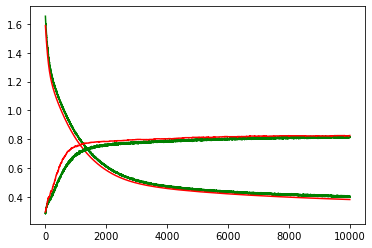

In [17]:
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'],'r')
plt.plot(history.epoch, history.history['acc'],'g')
plt.plot(history.epoch, history.history['val_acc'],'r')
loss, accuracy = model.evaluate(xtest,ytest)
print(accuracy*100)